In [73]:
# Title: EE559 Final Project
# Part 3: ERCOT Monthly Peak Demand Forecast by LASSO regression with polynomial basis
# Author: Xinghua Ren, Liyang Zhang

In [74]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# seaborn settings
sns.reset_defaults()
sns.set(color_codes = True)

In [75]:
# Read data

# Read excel files as DataFrame
# files_xls, files_xlsx defined for two formats of excel files
files = os.listdir()
files.sort()

files_xls = [f for f in files if f[-8:] == "Data.xls"]
files_xlsx = [f for f in files if f[-9:] == "Data.xlsx"]

df_xls = pd.DataFrame()
df_xlsx = pd.DataFrame()

titles = ["Hour_End", "ERCOT"]

for f in files_xls:
    data_xls = pd.read_excel(f, usecols = titles)
    df_xls = df_xls.append(data_xls)
    
for f in files_xlsx:
    data_xlsx = pd.read_excel(f, usecols = titles)
    df_xlsx = df_xlsx.append(data_xlsx)
    
df = df_xls.append(df_xlsx)

# Convert the DataFrame to a NumPy array
data_raw = df.to_numpy()

In [76]:
# function to get max value of each month, n is value amount of each month
def get_max_value(data, n):
    list_split = [data[i * n:(i + 1) * n] for i in range((len(data) + n - 1) // n )]
    array_split = np.asarray(list_split)
    data_max = [max(l) for l in array_split]
    return data_max

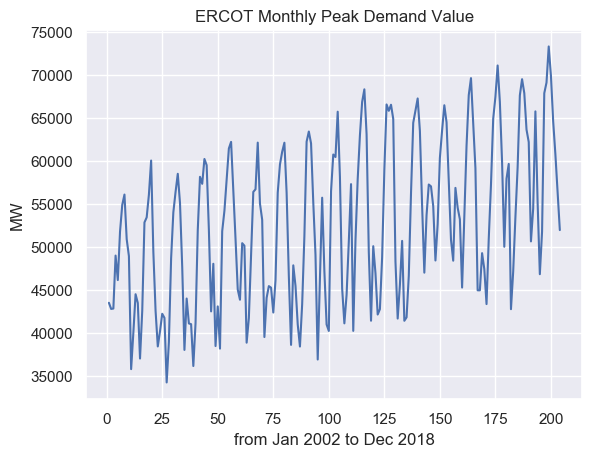

In [77]:
# Plot data

# data_x for each month from 2002 to 2018
data_x = np.array([range(1, 205)]).T

# Calculate peak demand value of ERCOT for each month
data_y = get_max_value(data_raw[:, 1], 730)

plt.plot(data_x, data_y)
plt.title("ERCOT Monthly Peak Demand Value")
plt.xlabel("from Jan 2002 to Dec 2018")
plt.ylabel("MW")
plt.show()

In [78]:
# function to create and combine sine and cosine features
# n means how many years of data
def sine_cosine_feature(data_x, n):
    sine = []
    cosine = []
    for i in range (1, 13):
        sine.append(np.sin(np.deg2rad(i * 30)))
        cosine.append(np.cos(np.deg2rad(i * 30)))

    sine = np.expand_dims(np.tile(np.asarray(sine), n), axis = 1)
    cosine = np.expand_dims(np.tile(np.asarray(cosine), n), axis = 1)

    data_x = np.concatenate((data_x, sine, cosine), axis = 1)    
    return data_x

data_x = sine_cosine_feature(data_x, 17)

In [79]:
# train test 13:4 split

train_size = 156
x_train_raw, x_test_raw = data_x[0:train_size], data_x[train_size:len(data_x)]
y_train_raw, y_test_raw = data_y[0:train_size], data_y[train_size:len(data_y)]

In [80]:
# function to generate polynomial basis and calculate MAE, MAPE

def poly_basis_single_sample(x, k):
    out = []
    for i in range(k + 1):
        out.append(np.power(x, i))
    return(np.asarray(out))

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

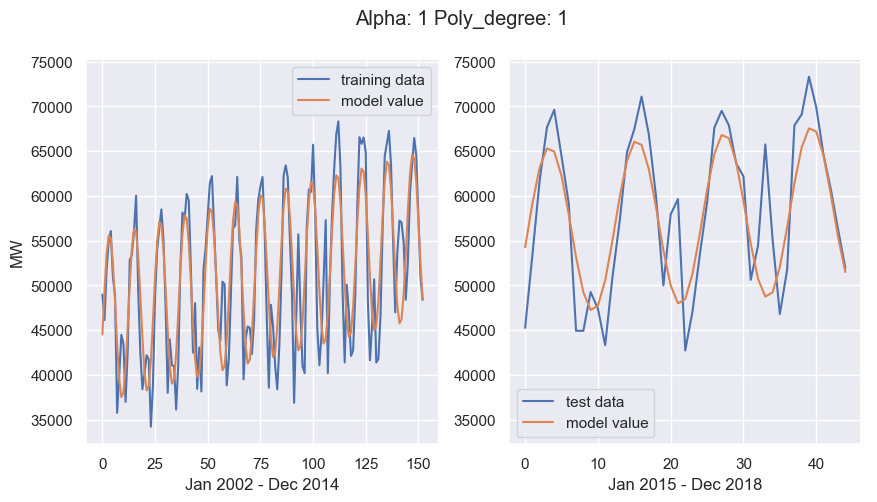

test MAE:  3925.9445248277775
test MAPE:  7.0342667265653205


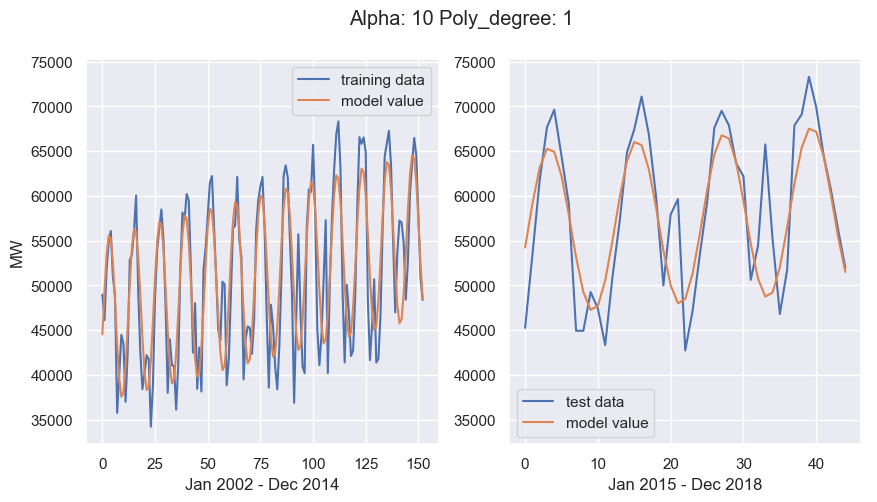

test MAE:  3929.6532069919235
test MAPE:  7.037455312556165


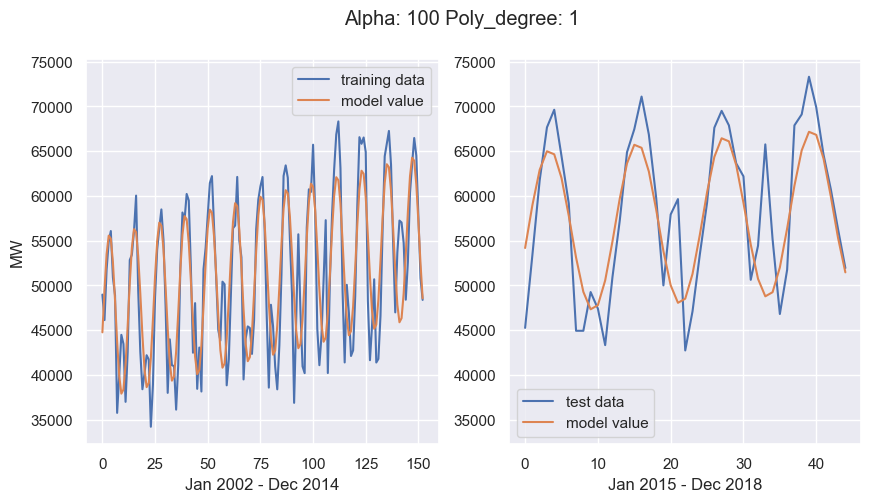

test MAE:  4017.5909309469157
test MAPE:  7.160501121647365


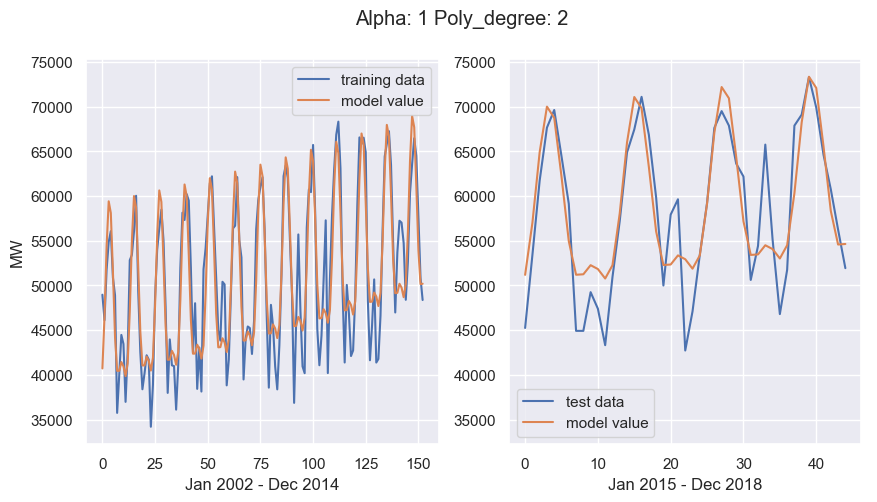

test MAE:  3338.7058284293303
test MAPE:  6.163737921232883


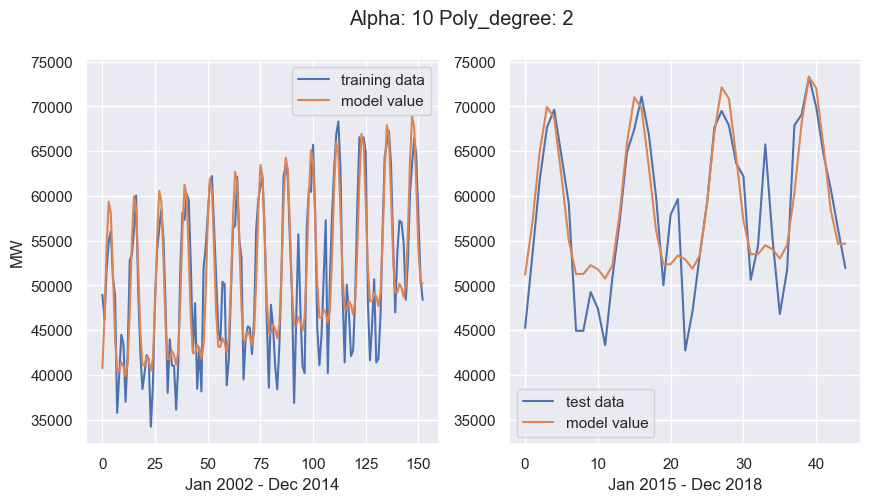

test MAE:  3332.5684519905085
test MAPE:  6.154760255605484


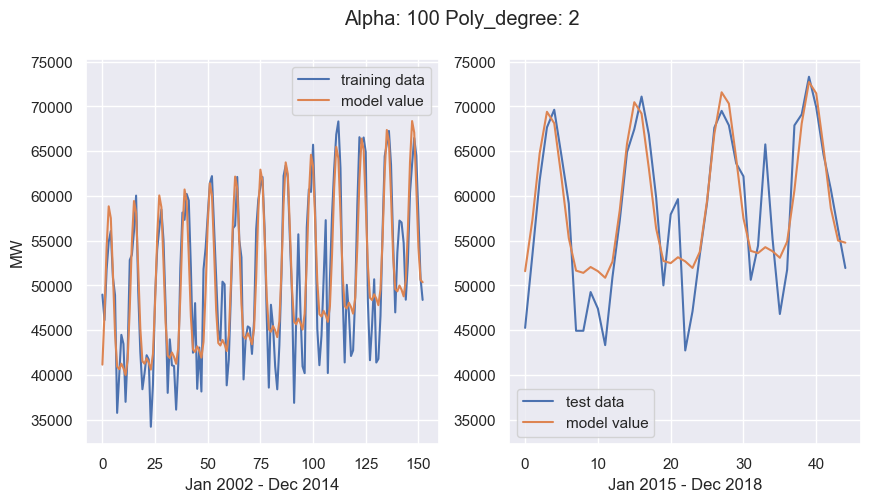

test MAE:  3348.974332288574
test MAPE:  6.205013196860677


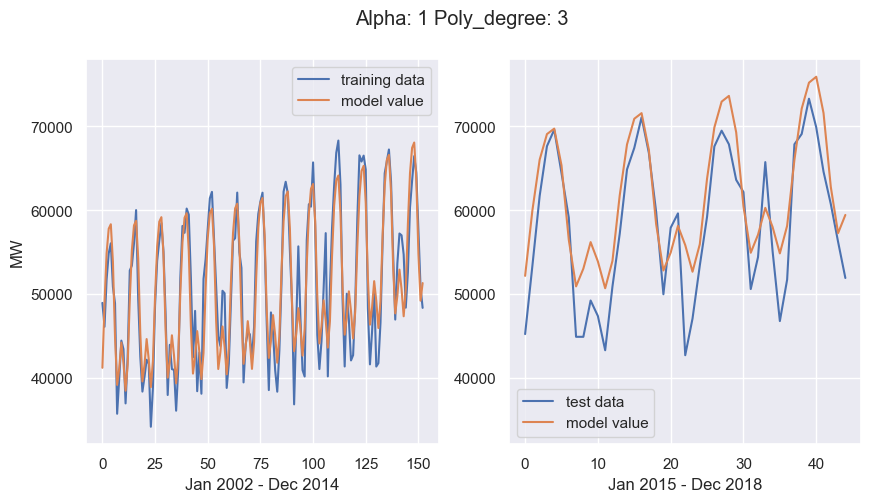

test MAE:  4145.884792544005
test MAPE:  7.754352194376199


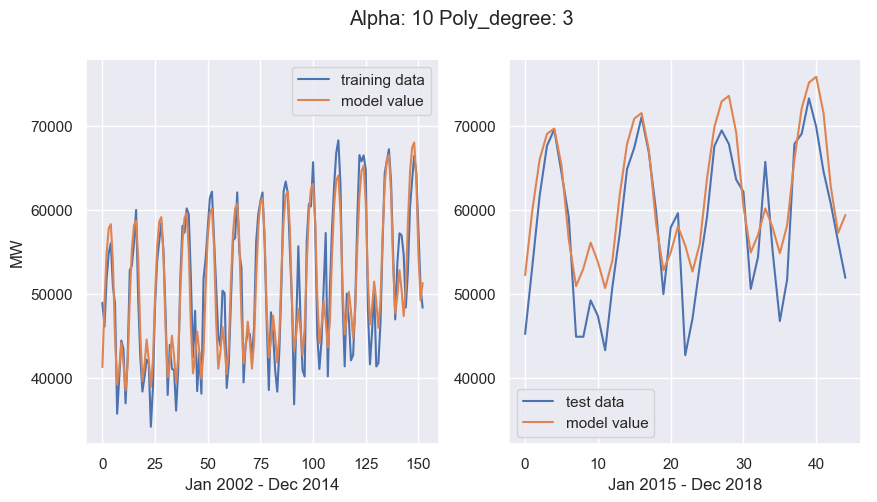

test MAE:  4142.546439181173
test MAPE:  7.74902499440808


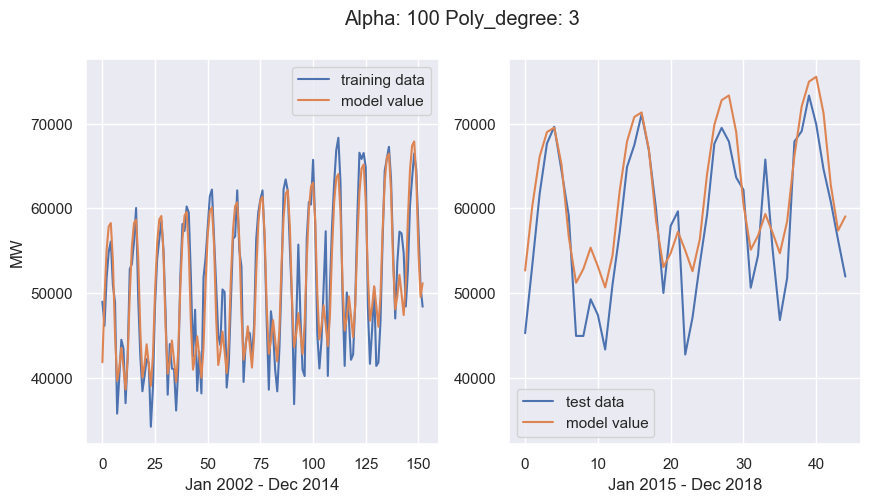

test MAE:  4085.525338149994
test MAPE:  7.644135392128034


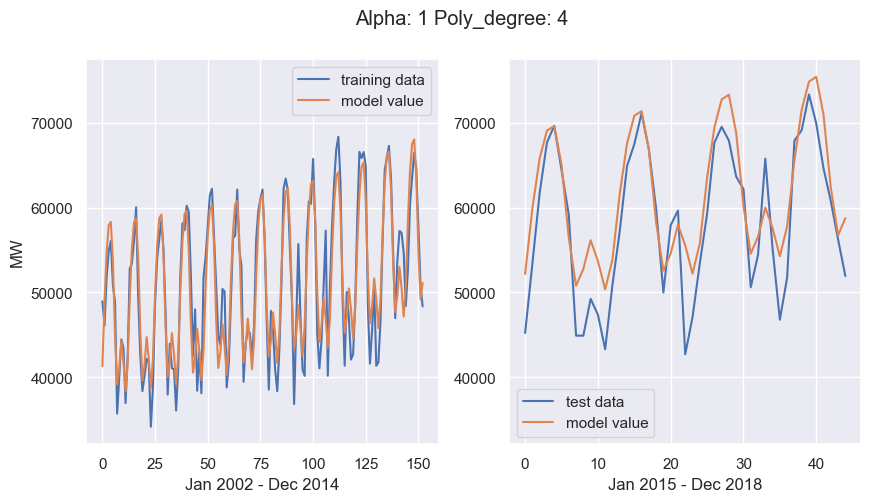

test MAE:  3907.9326808639685
test MAPE:  7.330877411478933


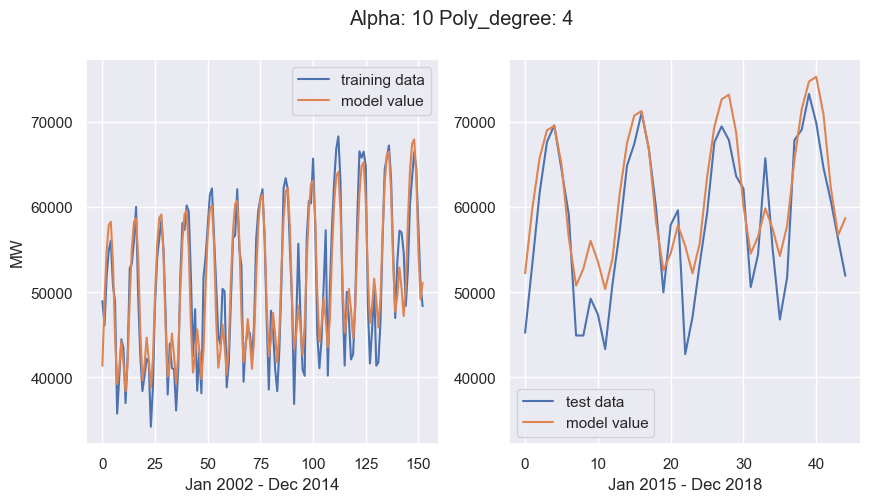

test MAE:  3901.5650789415517
test MAPE:  7.319054955054238


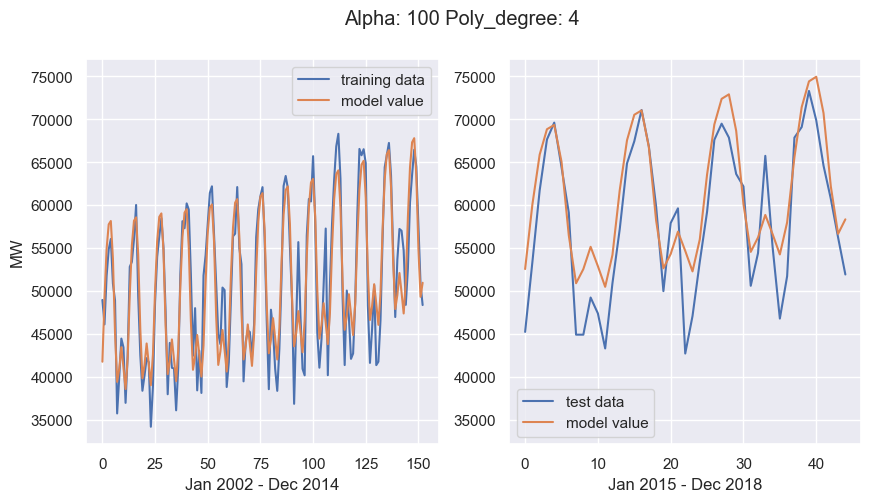

test MAE:  3854.881783521455
test MAPE:  7.227322599667381


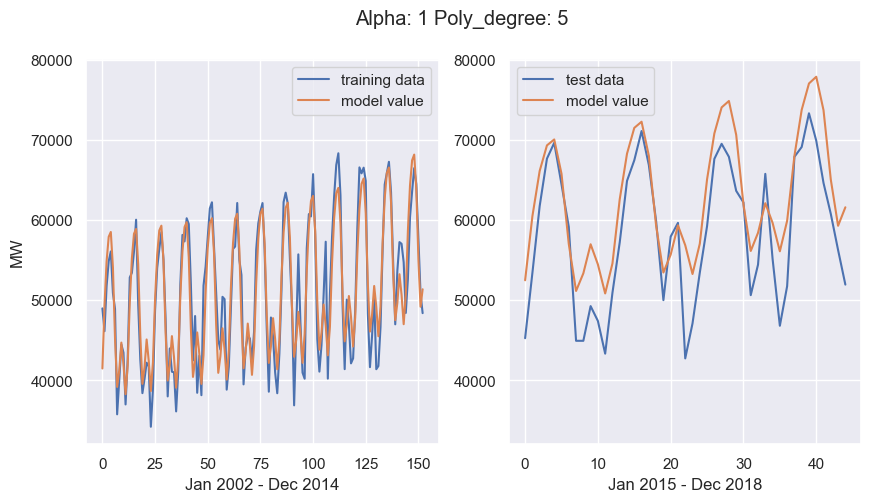

test MAE:  4792.83587544142
test MAPE:  8.898141703297851


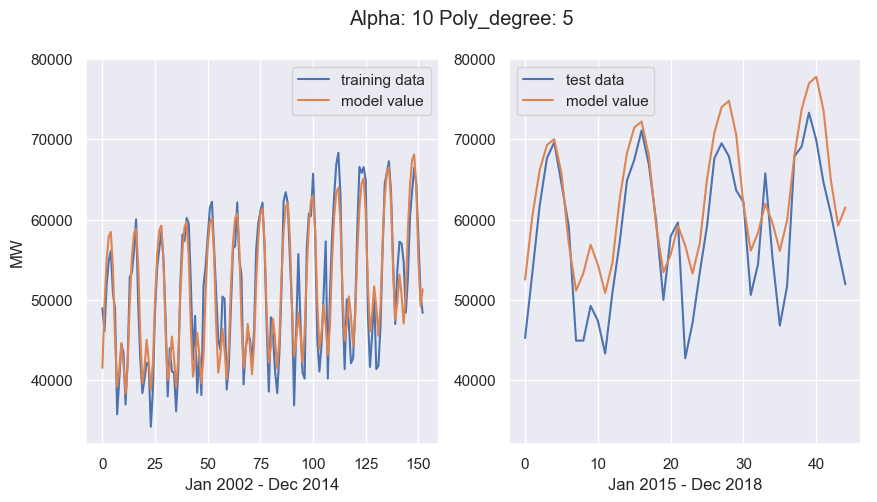

test MAE:  4781.874199790219
test MAPE:  8.879692961414307


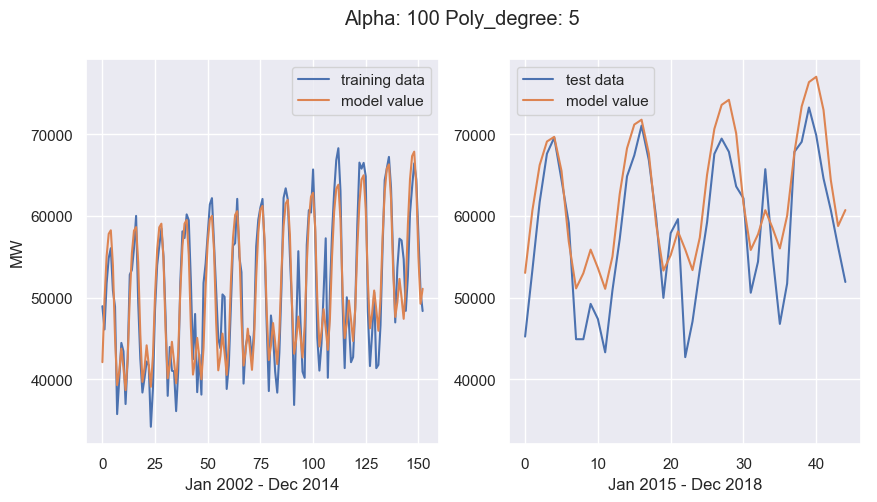

test MAE:  4643.336325763058
test MAPE:  8.639933242905682


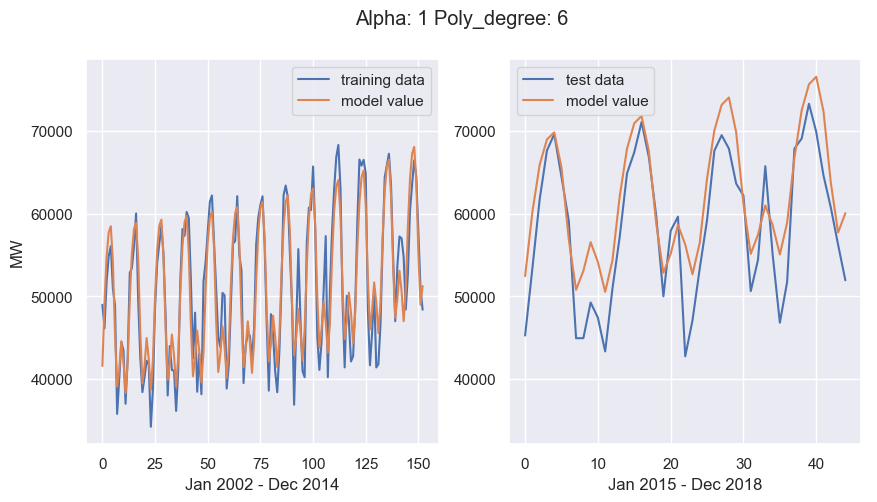

test MAE:  4314.876099142556
test MAPE:  8.054697316784218


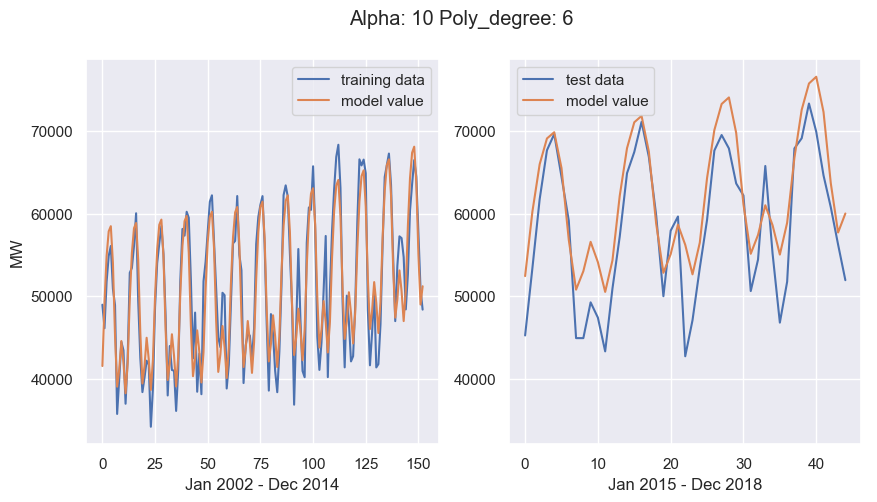

test MAE:  4310.699241687318
test MAPE:  8.044005410982088


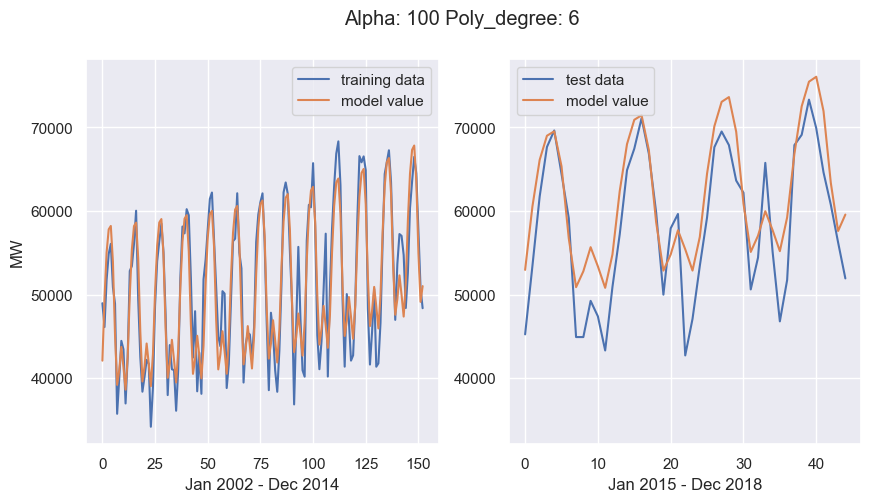

test MAE:  4272.834463724285
test MAPE:  7.980466965708718


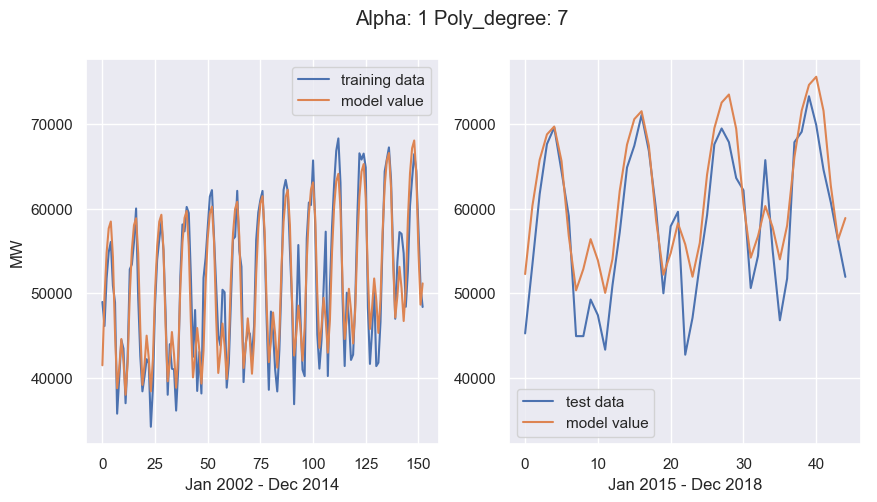

test MAE:  3947.0361477246106
test MAPE:  7.387981714402516


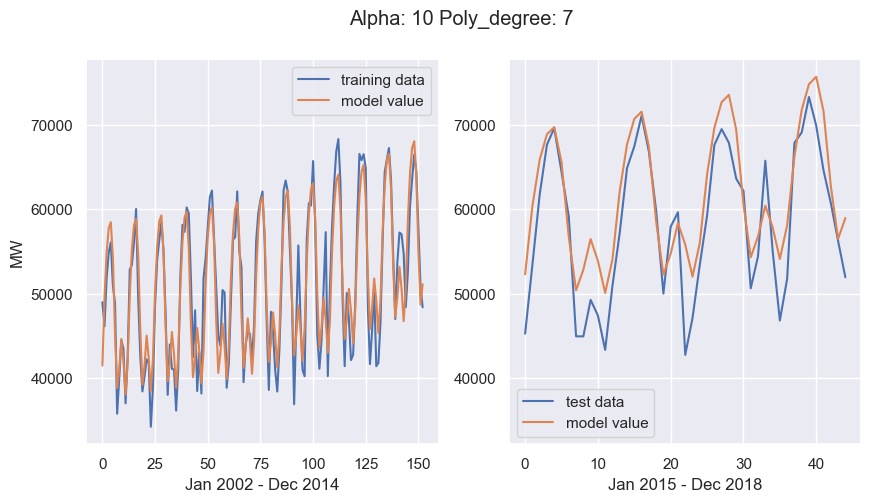

test MAE:  3990.9745134404143
test MAPE:  7.4628132268845455


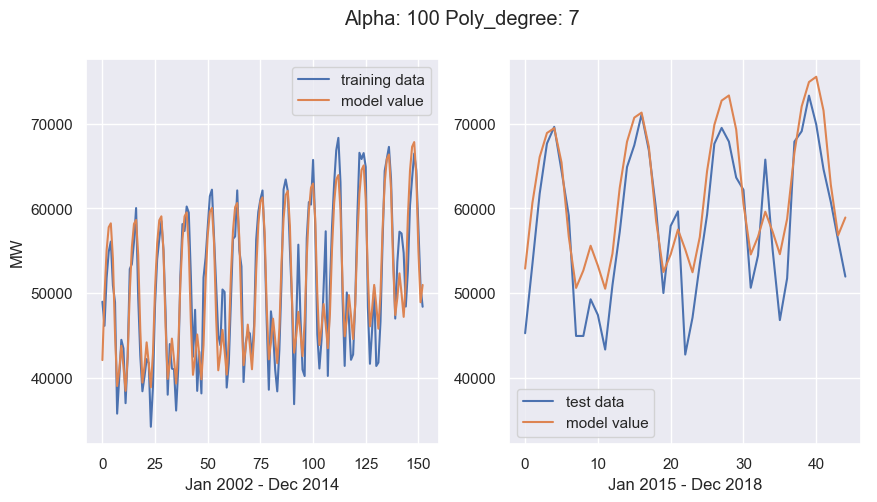

test MAE:  4077.6877725317895
test MAPE:  7.62146661766452


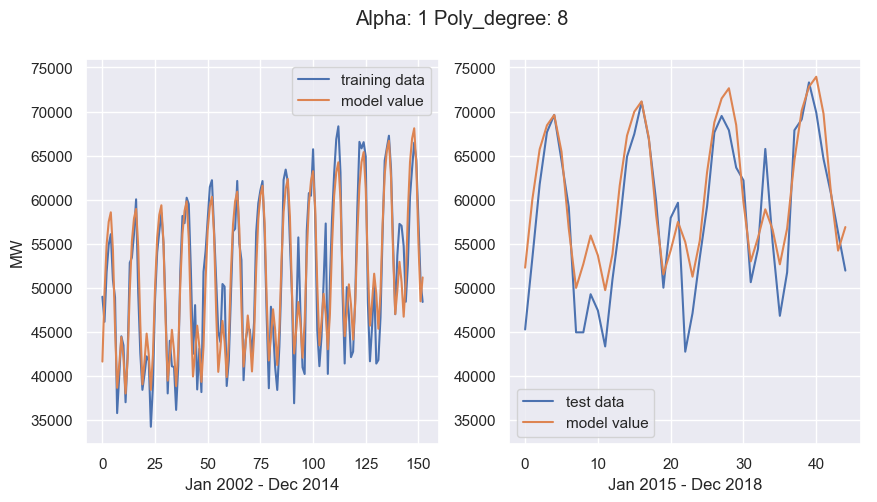

test MAE:  3491.5922592644038
test MAPE:  6.5777848274445


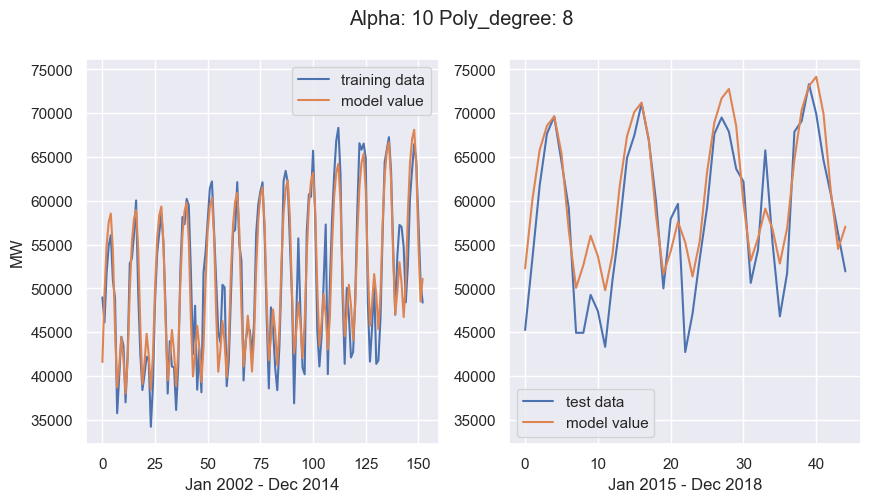

test MAE:  3544.732142787673
test MAPE:  6.674563371090938


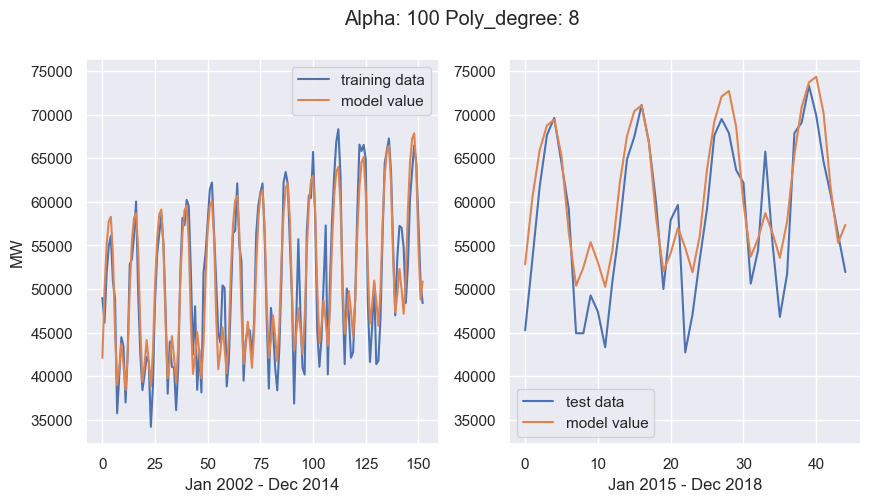

test MAE:  3713.9835695327206
test MAPE:  6.977558298043304


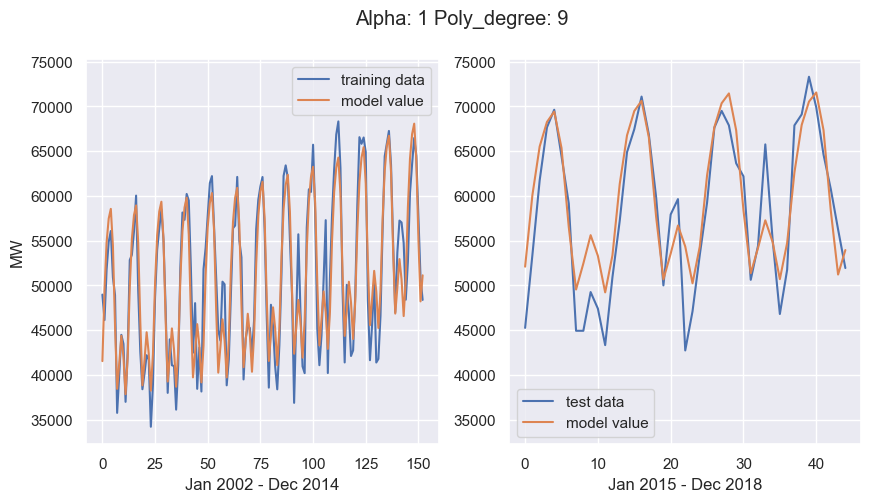

test MAE:  3195.850757743012
test MAPE:  5.969890203663388


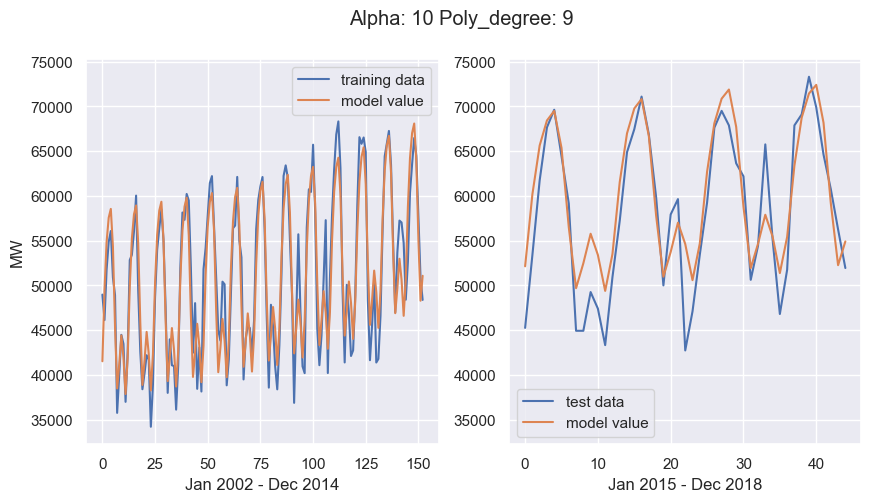

test MAE:  3271.5548668451347
test MAPE:  6.136148968593985


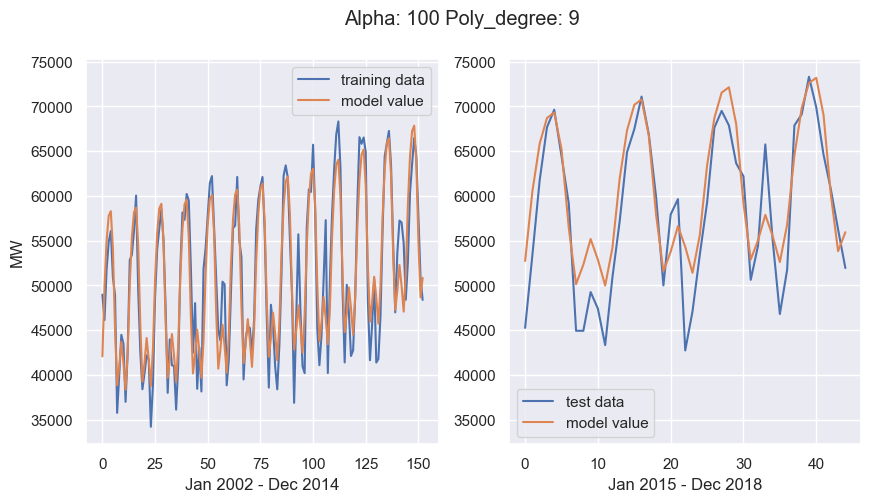

test MAE:  3490.852327858751
test MAPE:  6.555755542330637


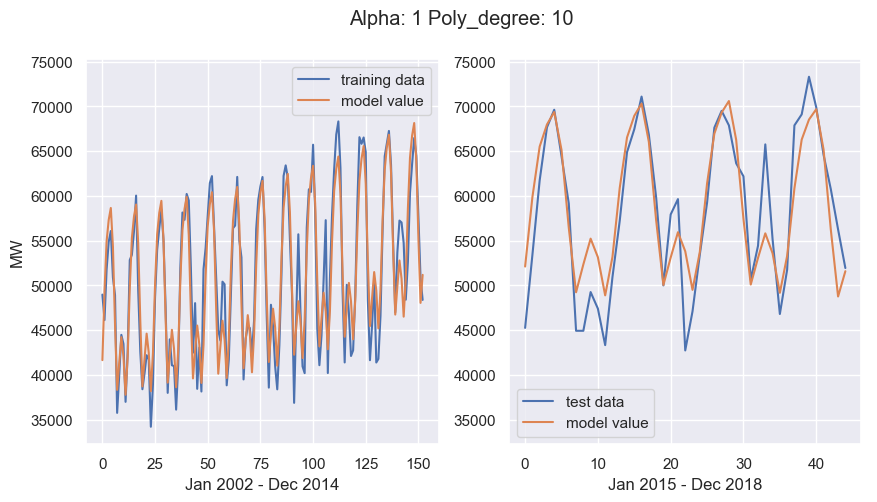

test MAE:  3196.3416022673546
test MAPE:  5.8940858652705845


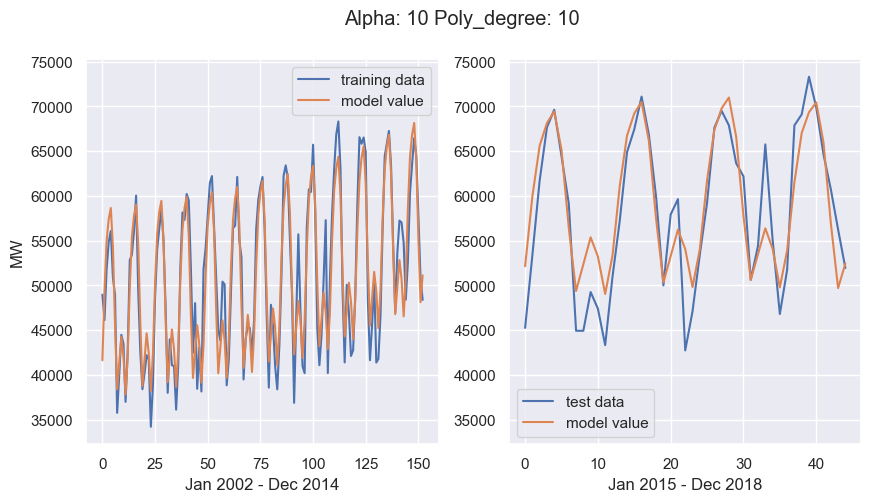

test MAE:  3172.2297070466557
test MAPE:  5.883322872899783


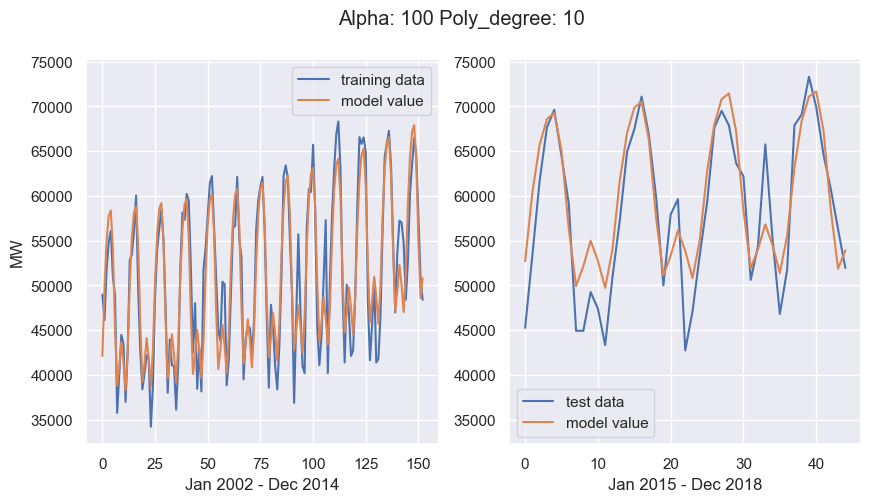

test MAE:  3350.247676324104
test MAPE:  6.258232045198195


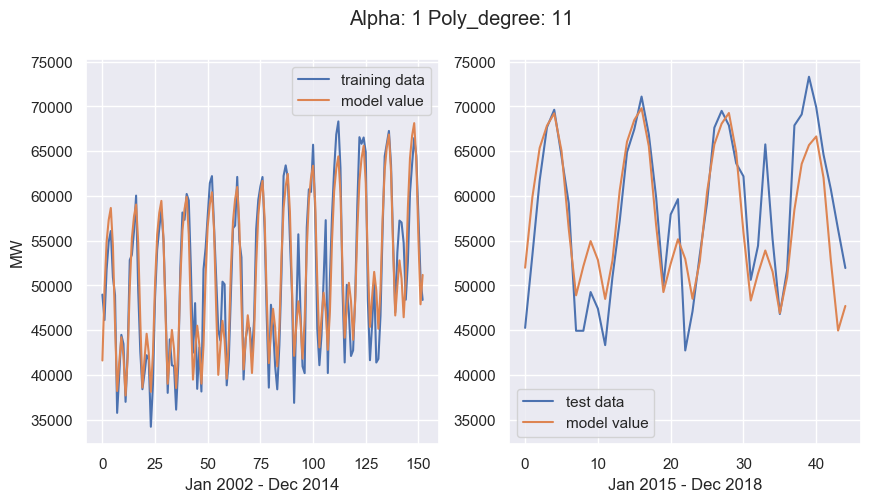

test MAE:  3816.563172074384
test MAPE:  6.842407839533236


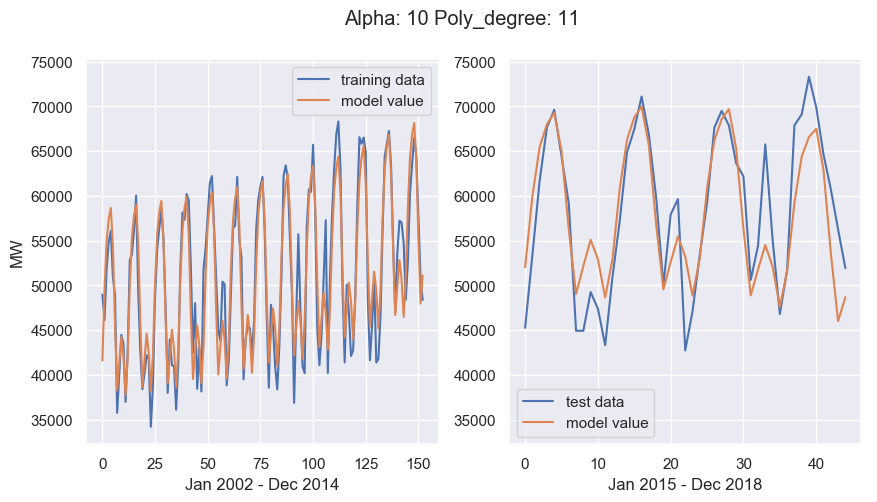

test MAE:  3626.5085423516175
test MAPE:  6.549586563991129


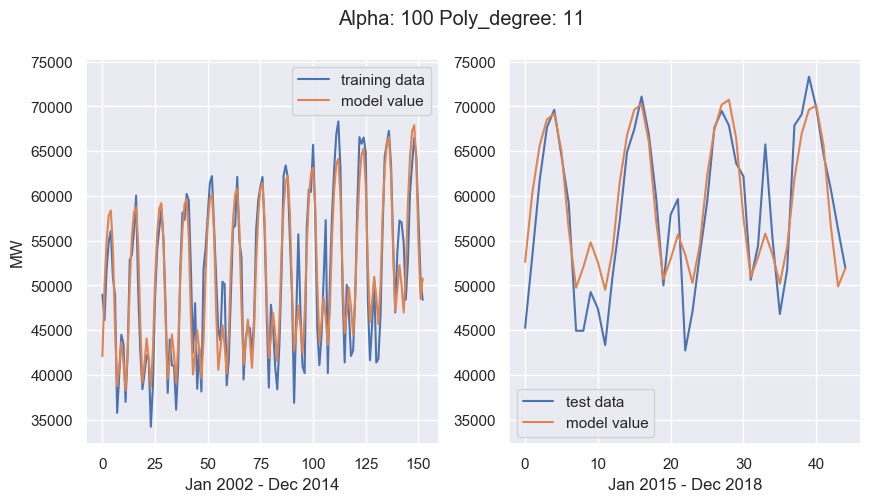

test MAE:  3311.769060995004
test MAPE:  6.130928496080808


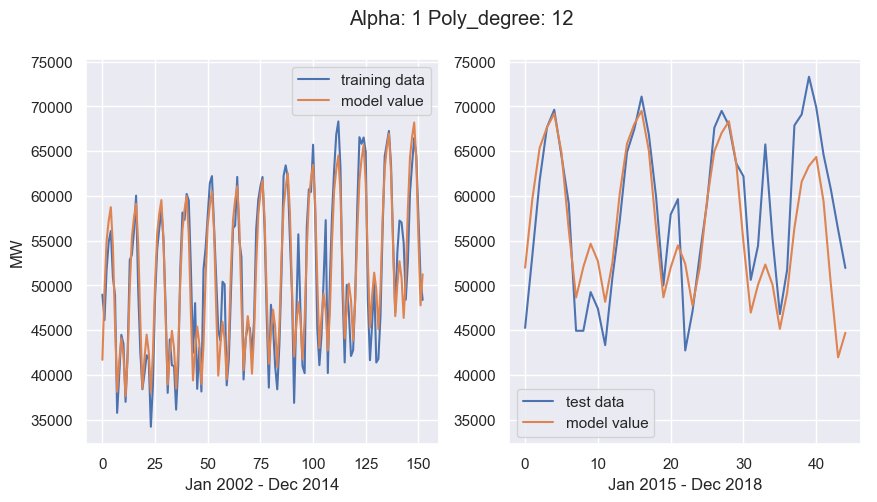

test MAE:  4444.60125743079
test MAPE:  7.873457193762985


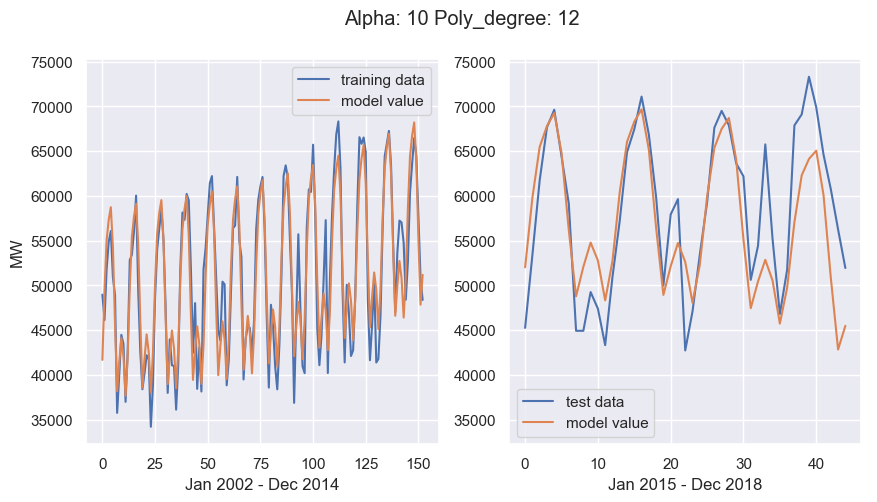

test MAE:  4262.211175050751
test MAPE:  7.578160954273534


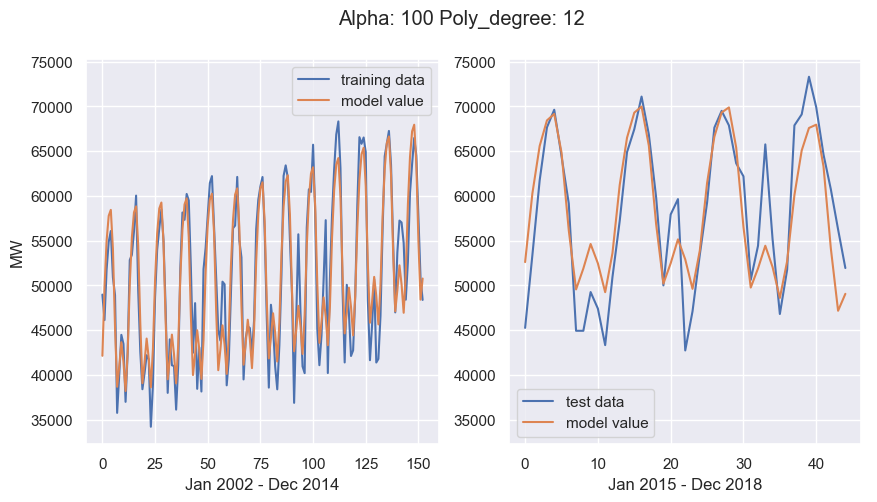

test MAE:  3606.0505980611906
test MAPE:  6.5548269647038655


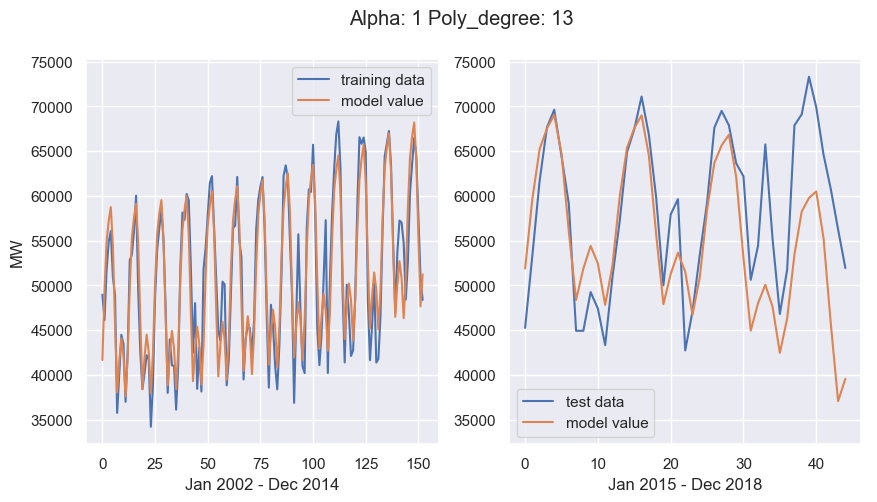

test MAE:  5660.788312053835
test MAPE:  9.877016237701849


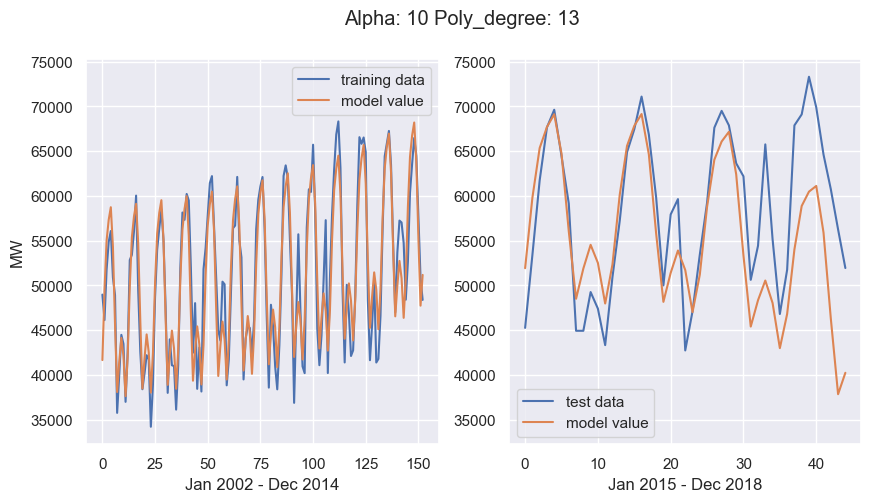

test MAE:  5441.242181951487
test MAPE:  9.518269323276817


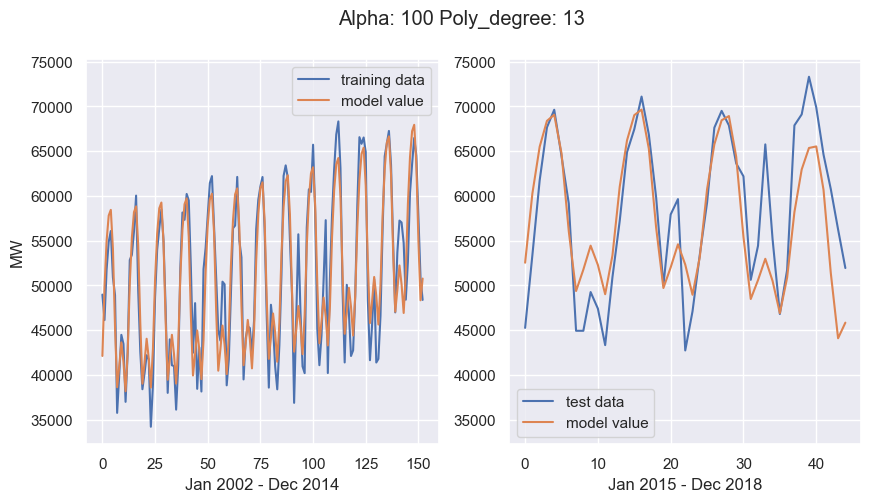

test MAE:  4117.183565880905
test MAPE:  7.341605107996663


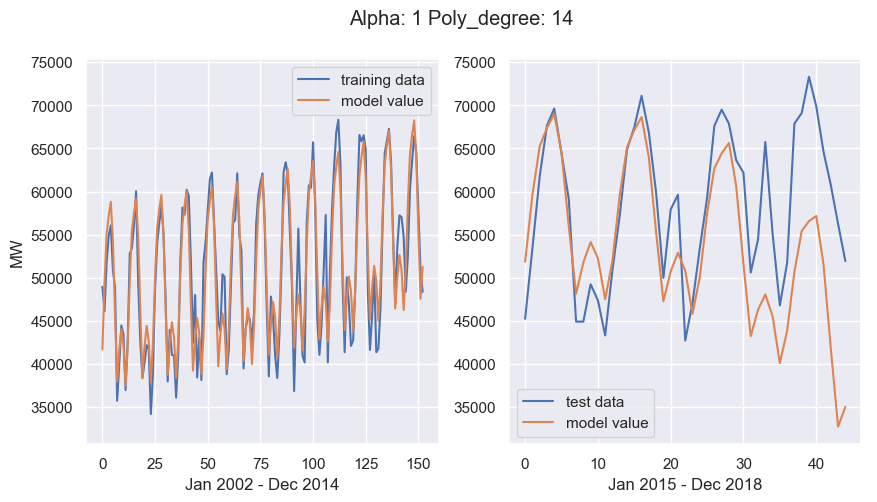

test MAE:  6787.340939703847
test MAPE:  11.741196183430757


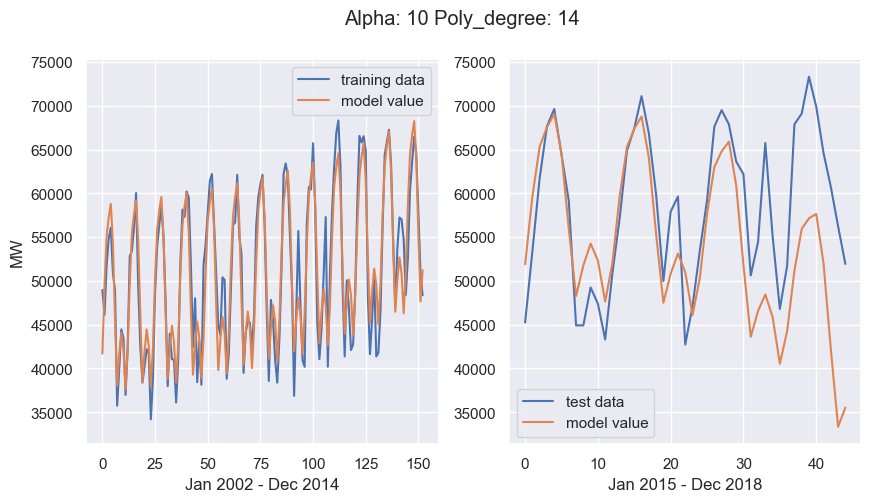

test MAE:  6599.8312869660995
test MAPE:  11.437325602833834


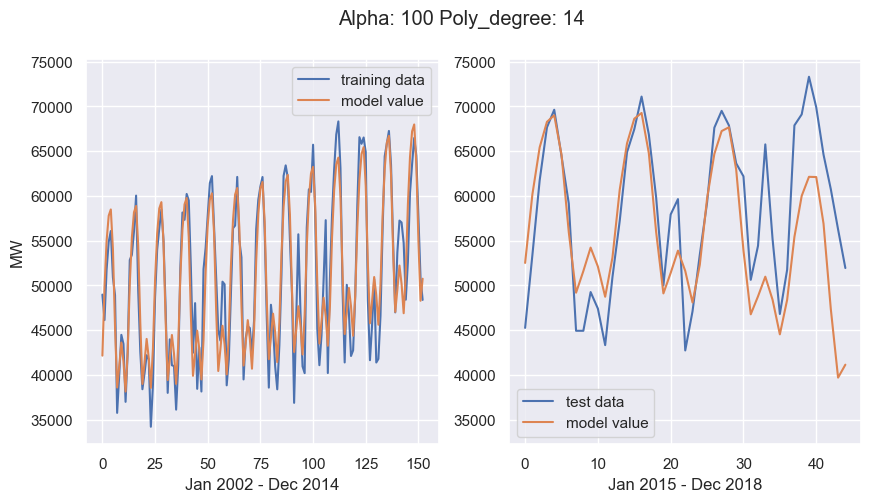

test MAE:  5081.19248383693
test MAPE:  8.929873102105425


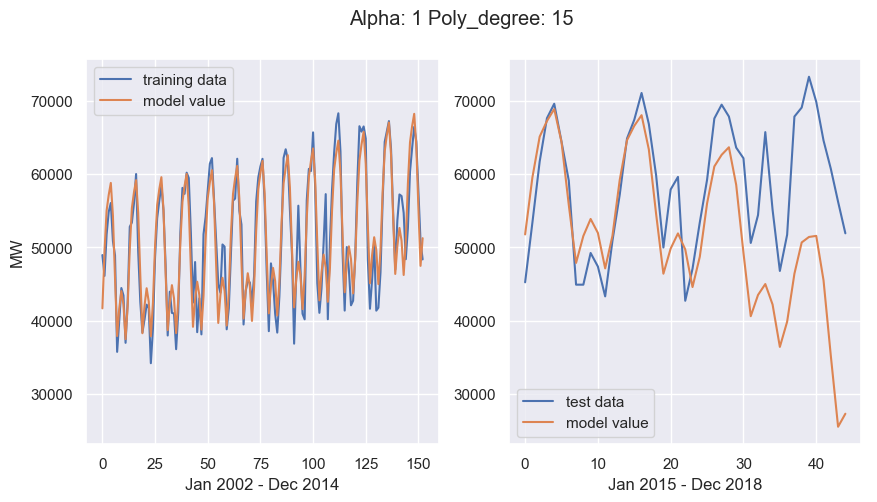

test MAE:  8621.766037109737
test MAPE:  14.779059767646288


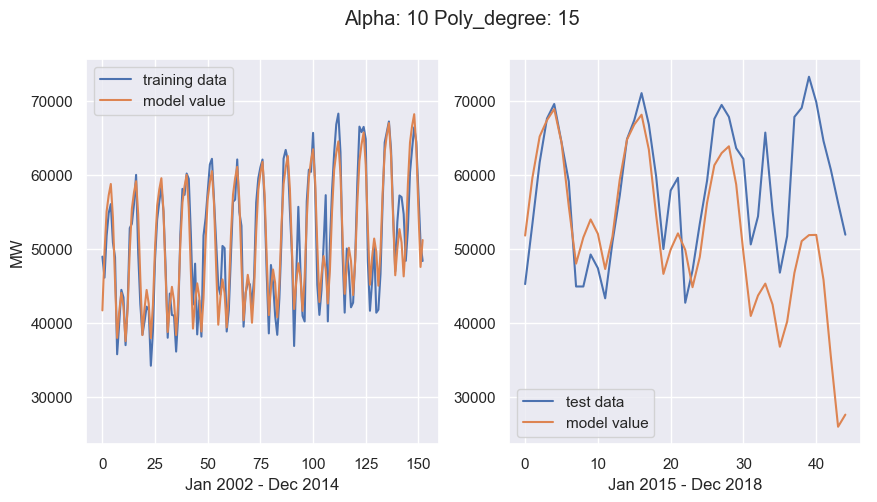

test MAE:  8477.541483816916
test MAPE:  14.547852462267297


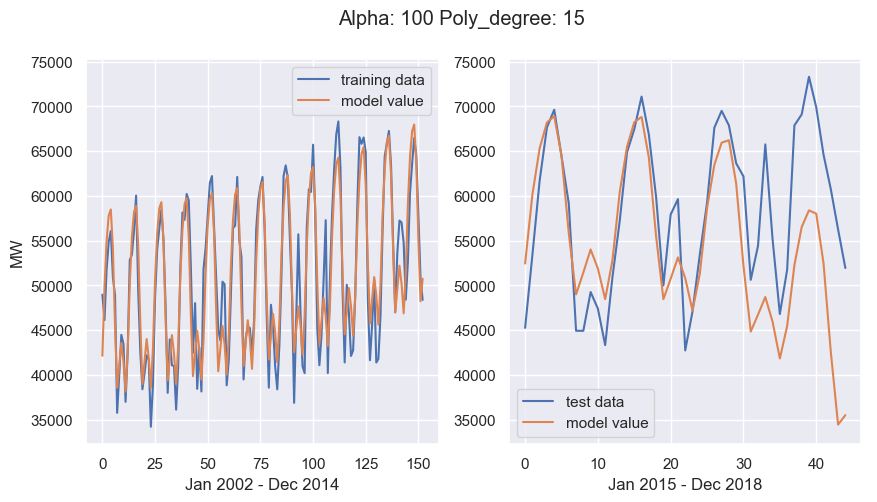

test MAE:  6337.799923648591
test MAPE:  10.994452766283615


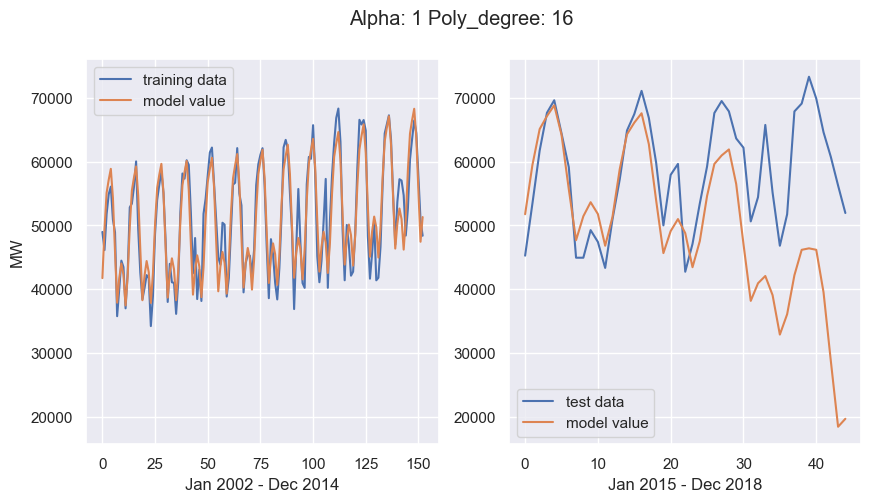

test MAE:  10410.408766794268
test MAPE:  17.741734483174003


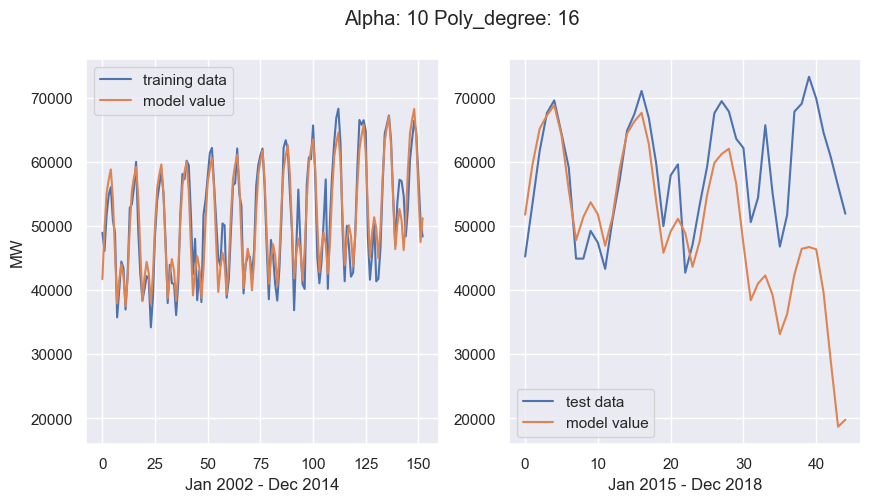

test MAE:  10303.232325851139
test MAPE:  17.571605877156856


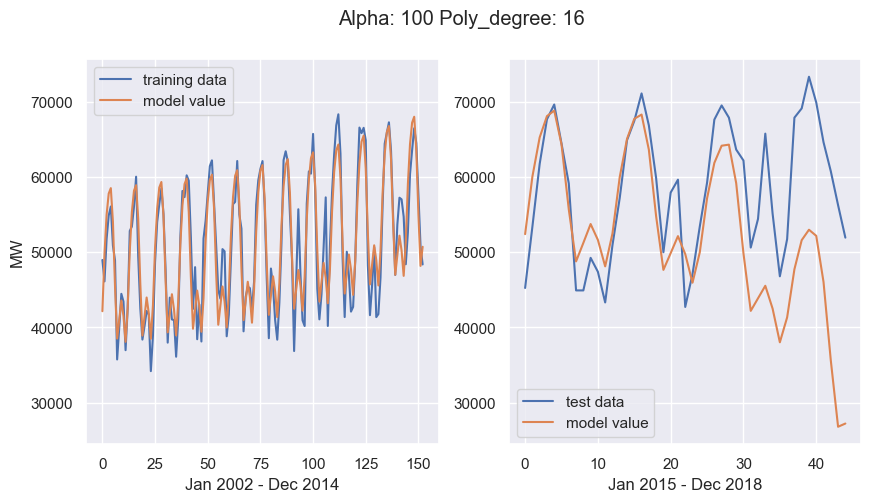

test MAE:  8205.341473094137
test MAPE:  14.093484664493902


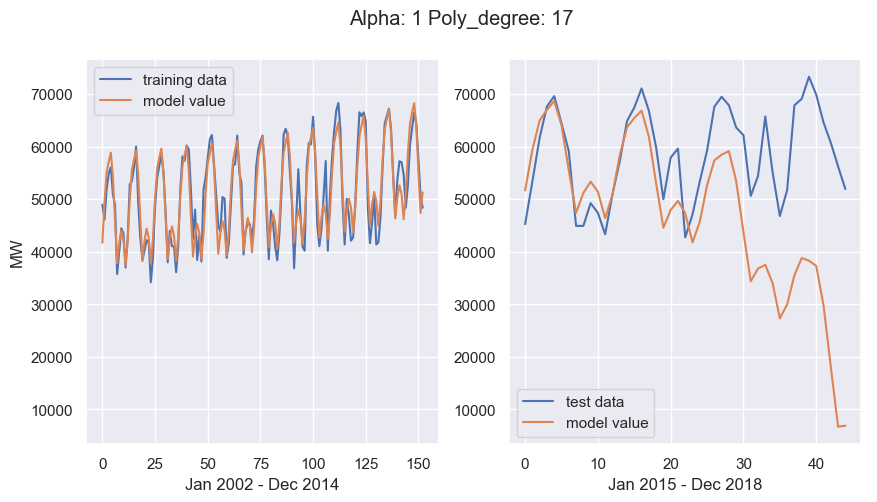

test MAE:  13256.93390639342
test MAPE:  22.464378861034117


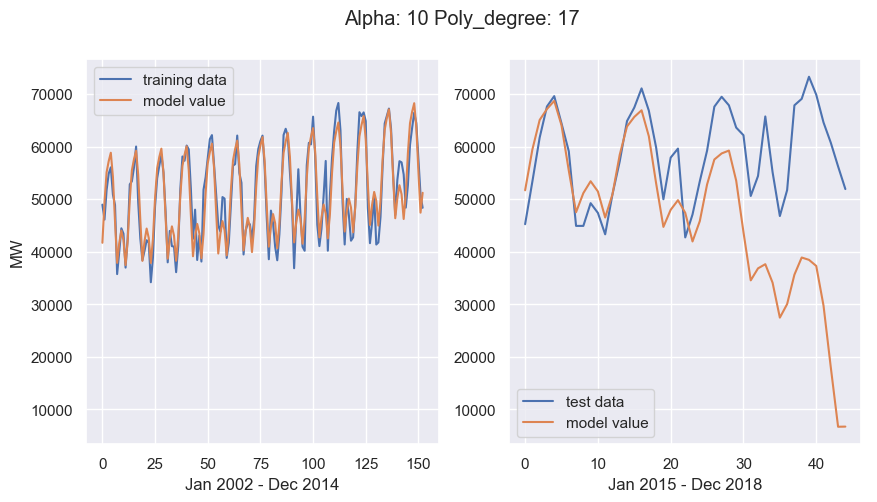

test MAE:  13210.964820030342
test MAPE:  22.394685306133365


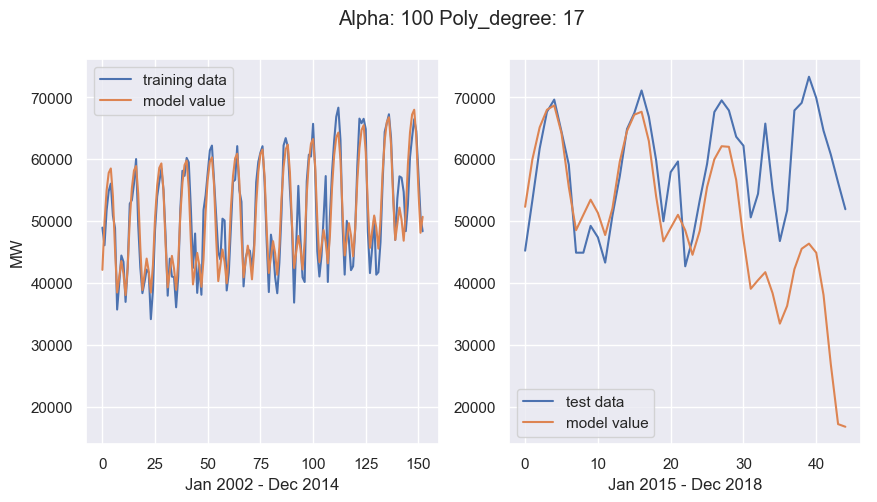

test MAE:  10512.969255750897
test MAPE:  17.923260292443956


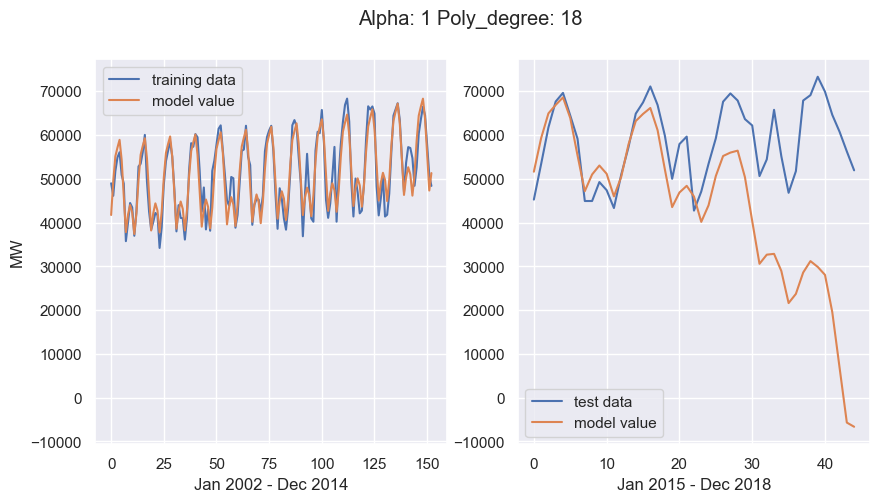

test MAE:  16210.899580978186
test MAPE:  27.373159741676368


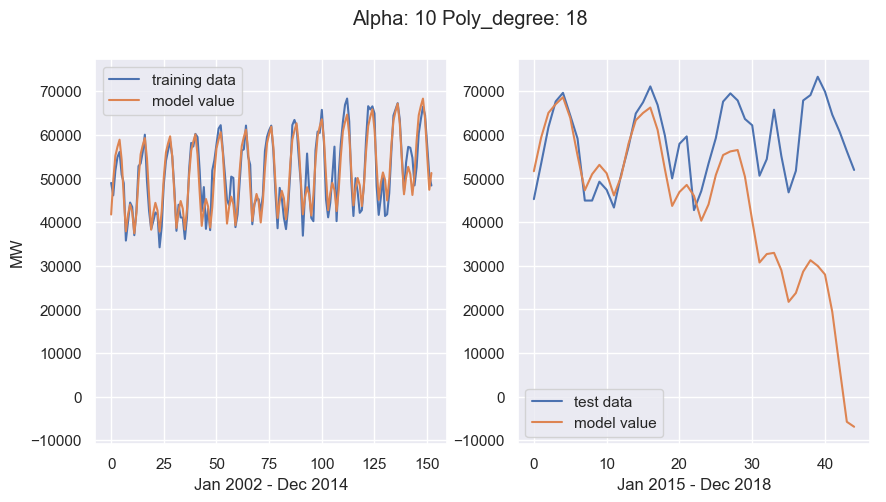

test MAE:  16193.156834244135
test MAPE:  27.350198159501847


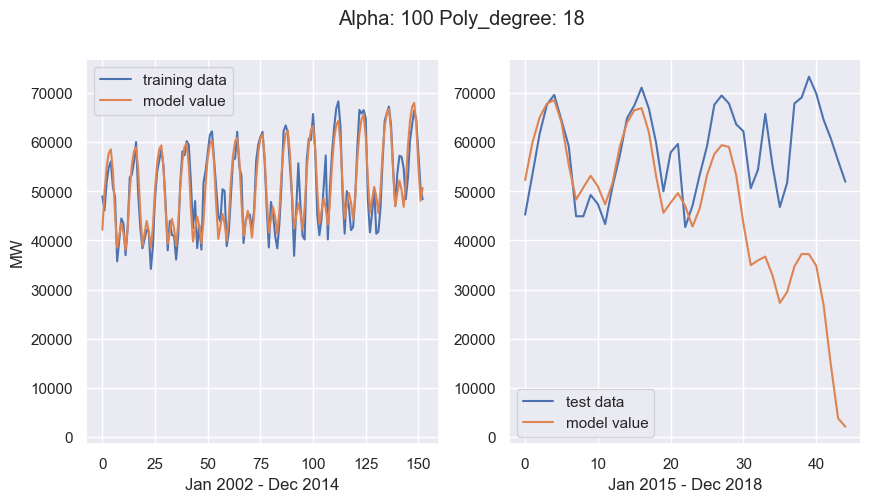

test MAE:  13702.399320994778
test MAPE:  23.21790372255193


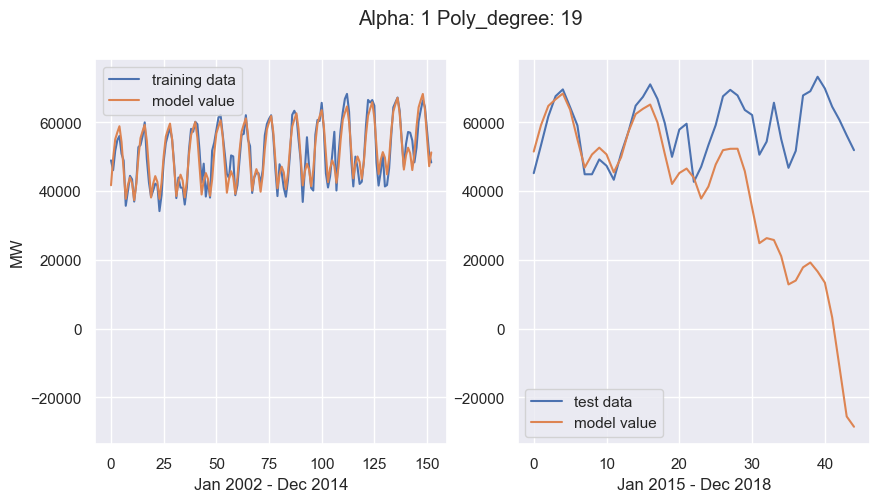

test MAE:  20801.526102596123
test MAPE:  35.008963189277566


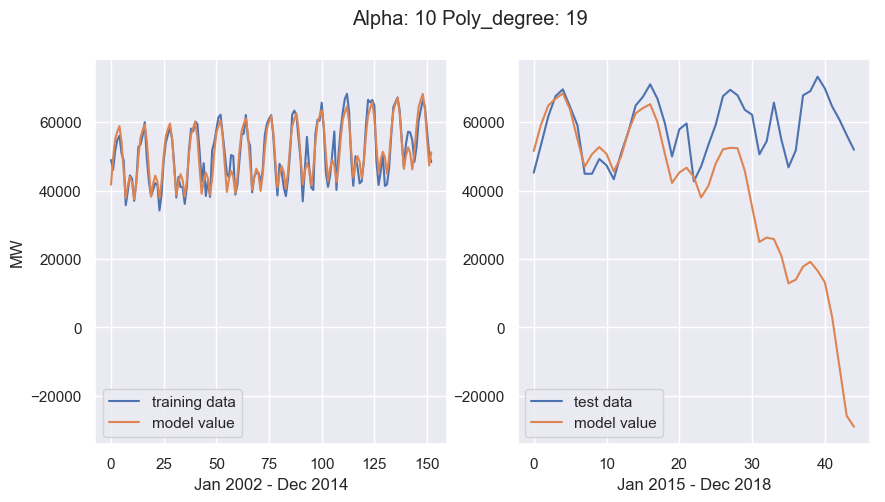

test MAE:  20826.924132458415
test MAPE:  35.05801140399746


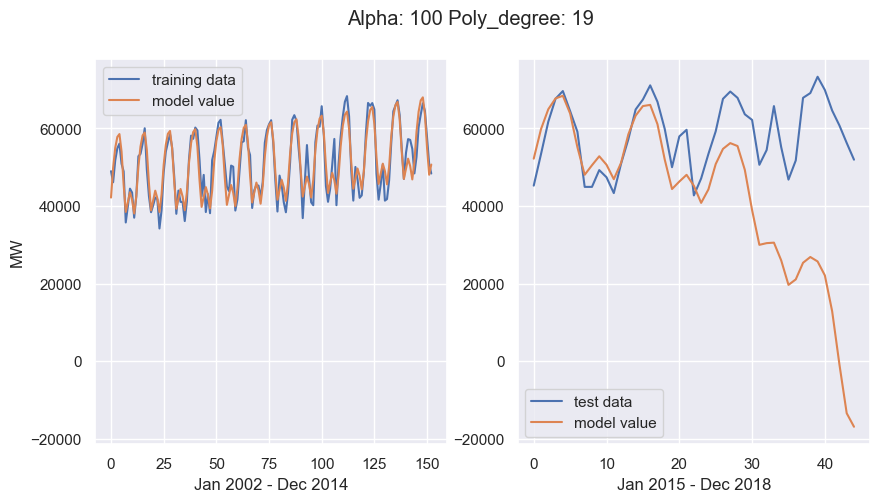

test MAE:  17670.49672715452
test MAPE:  29.811015561097072


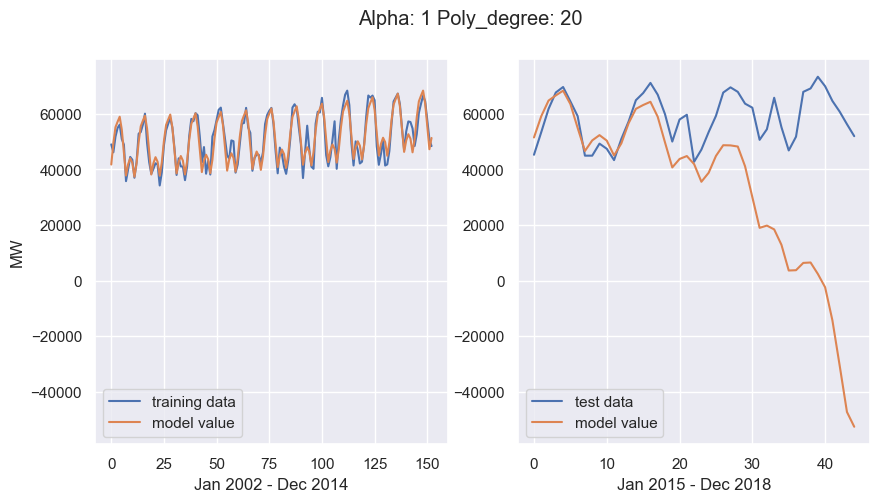

test MAE:  25750.714654310068
test MAPE:  43.273757827122054


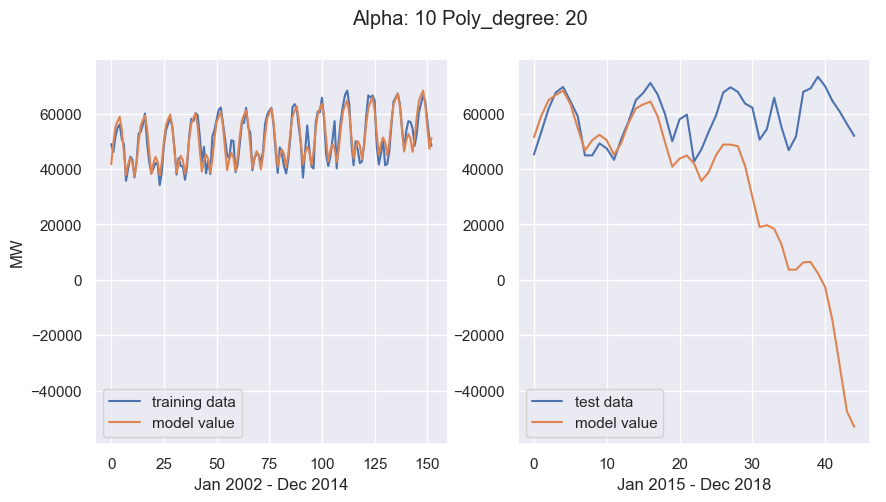

test MAE:  25756.606599493676
test MAPE:  43.287822609288845


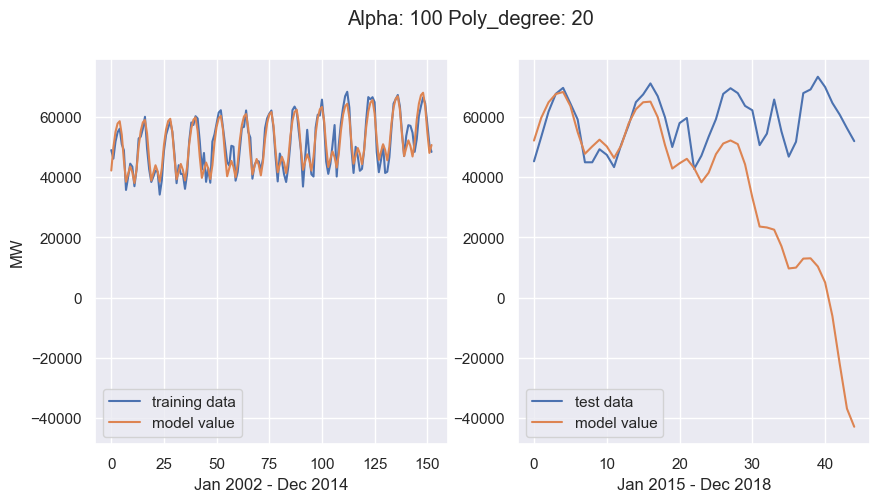

test MAE:  22932.85304335245
test MAPE:  38.5666254056816


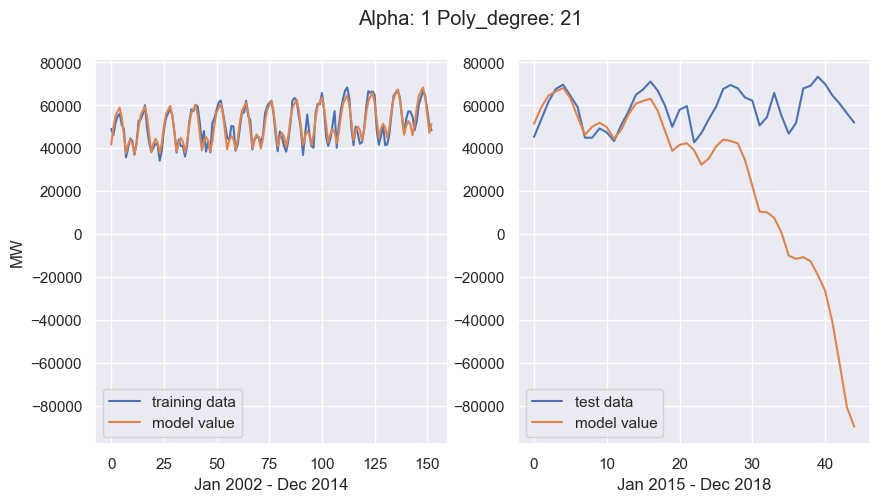

test MAE:  33194.08092152658
test MAPE:  55.75855005906389


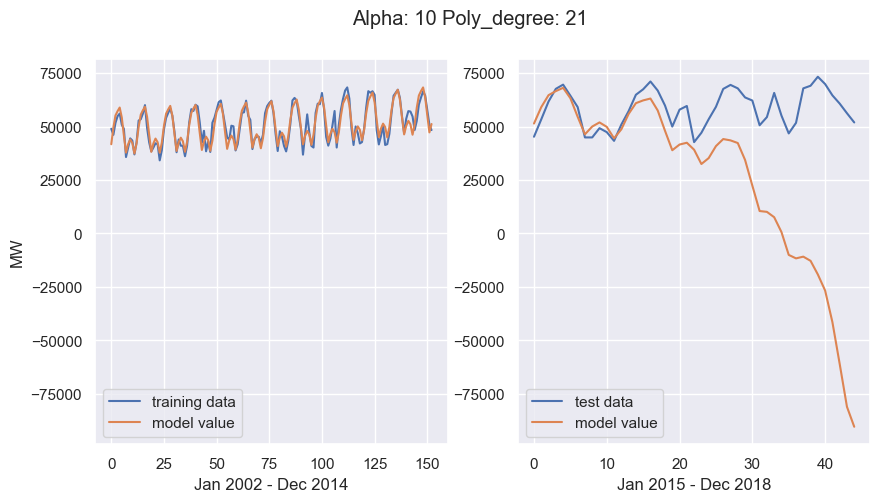

test MAE:  33237.10582953419
test MAPE:  55.834860100952724


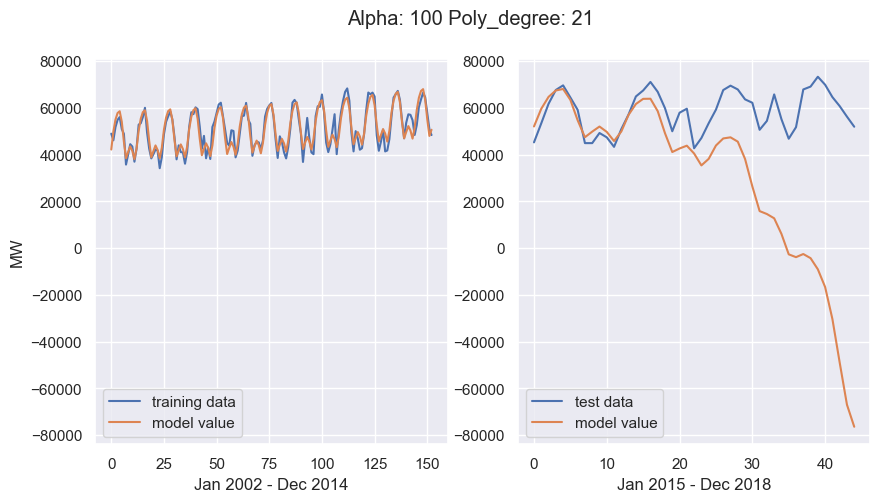

test MAE:  29637.648642664946
test MAPE:  49.80145440407279


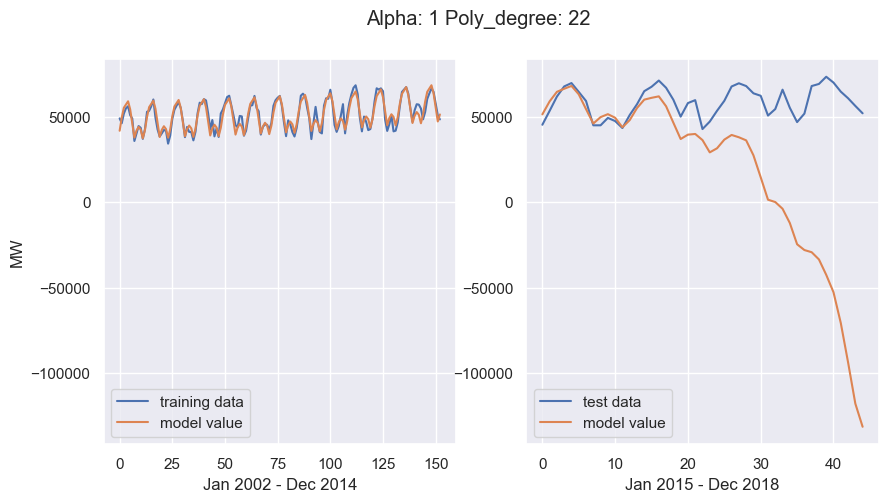

test MAE:  41254.26115202759
test MAPE:  69.27902819654231


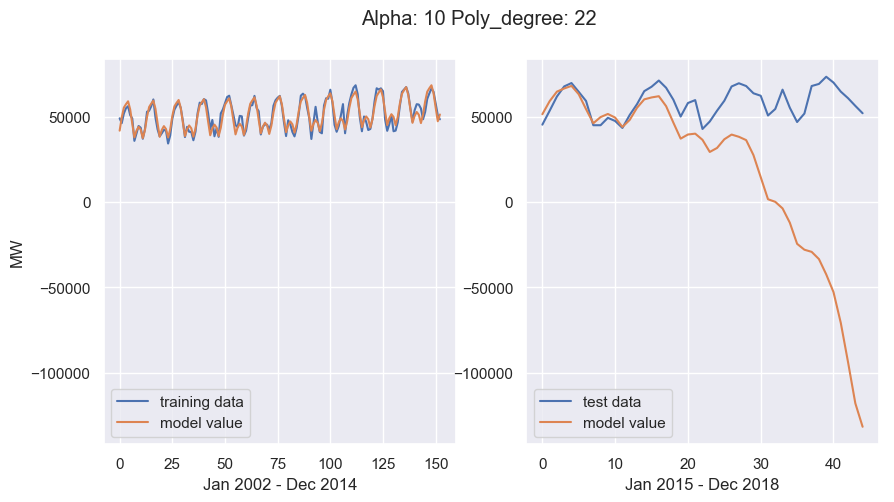

test MAE:  41234.45431085969
test MAPE:  69.24996225162657


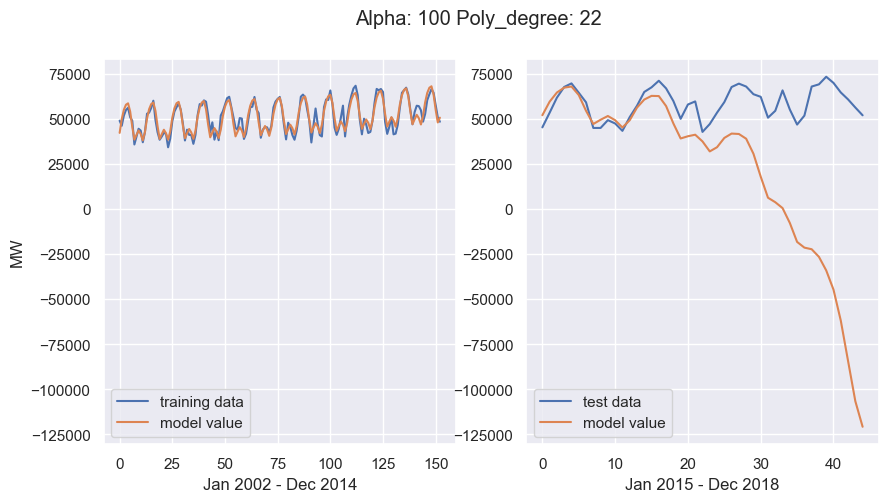

test MAE:  38253.199839688365
test MAPE:  64.25332067368655


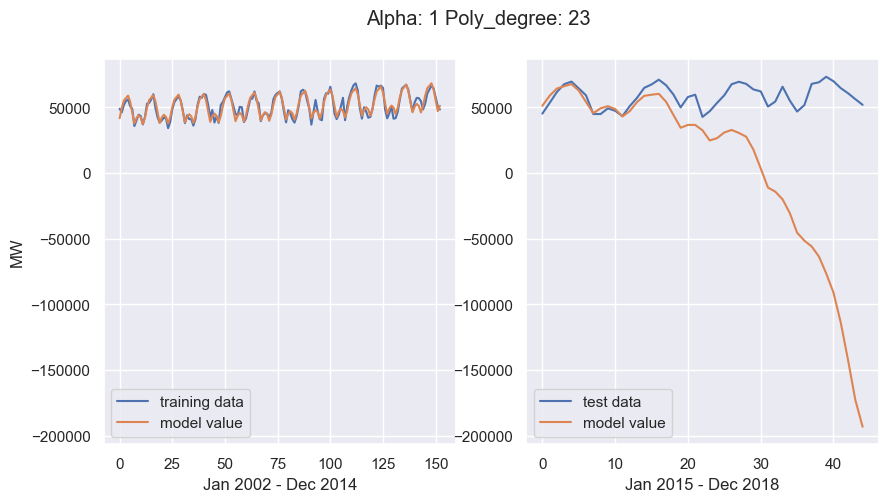

test MAE:  52844.89005253815
test MAPE:  88.73262268048263


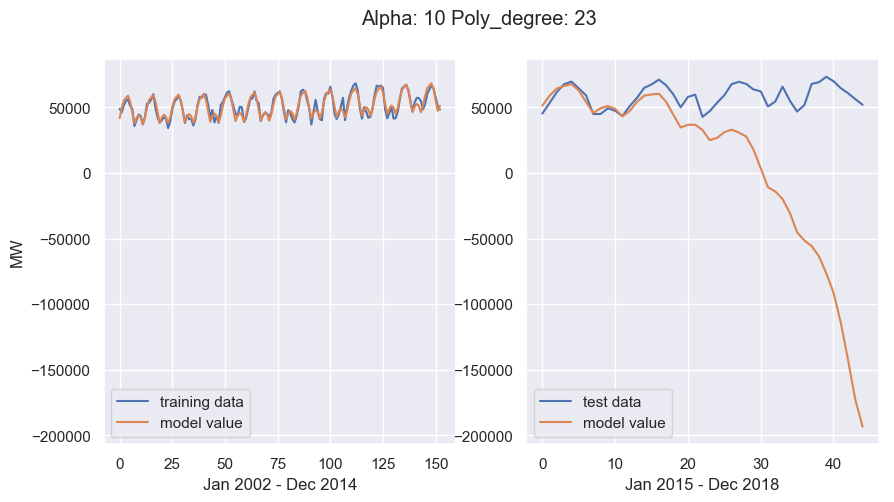

test MAE:  52818.174483016475
test MAPE:  88.68834526465513


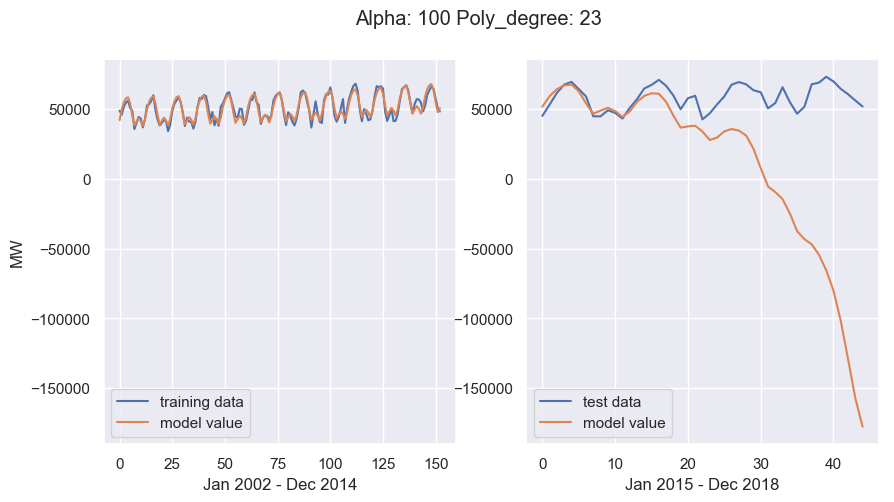

test MAE:  48967.0977528684
test MAPE:  82.22795479291443


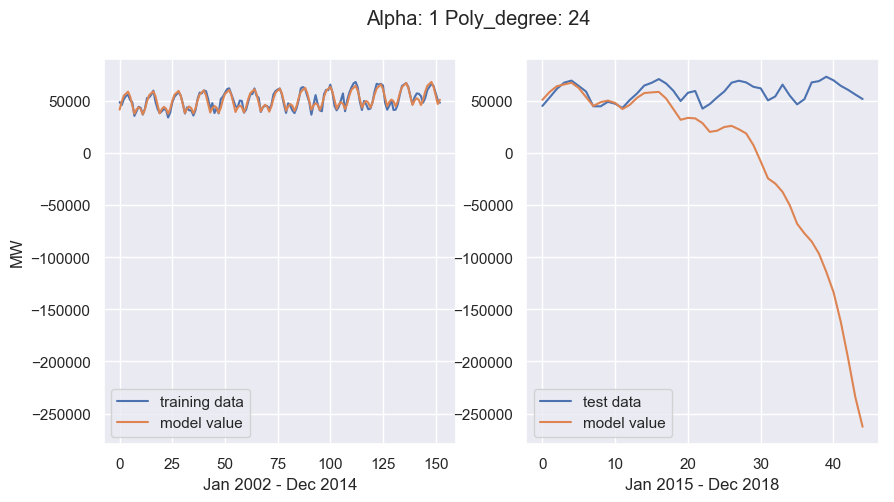

test MAE:  65510.32534671404
test MAPE:  110.00415232951246


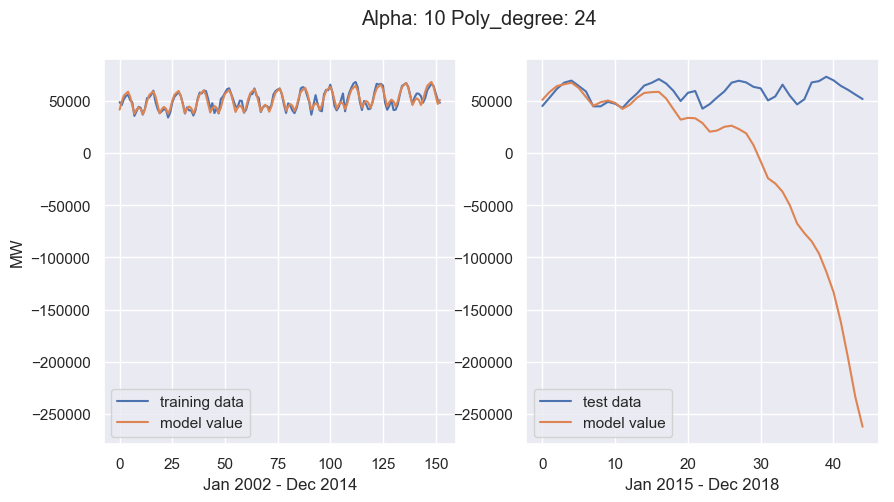

test MAE:  65341.931439498316
test MAPE:  109.72188373970744


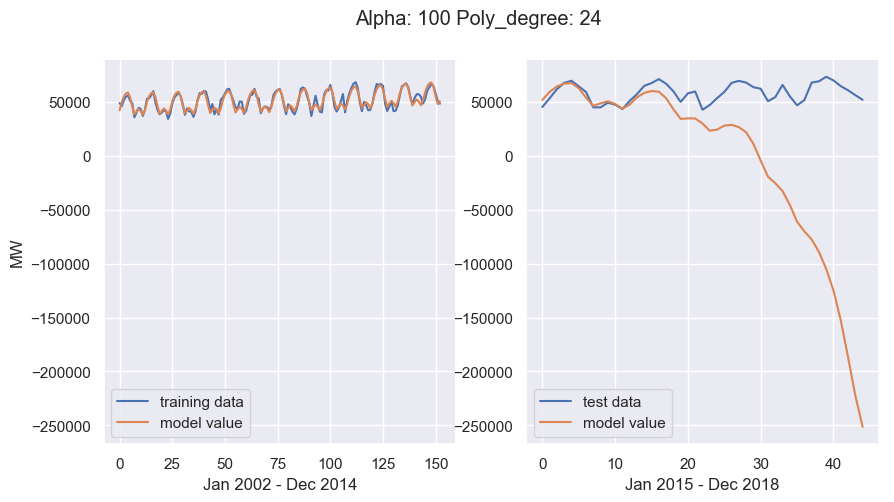

test MAE:  62319.64112431429
test MAPE:  104.63234883512888


In [81]:
# LASSO regression
# Test performance of different alpha and poly_degree value combination

# Configurable parameters
poly_degree = np.arange(1, 25, 1)
alpha_value = [1, 10, 100]

mape_a_test = []
mape_p_test = []
mape_y_test = []

for p in poly_degree:

    x_train = []
    for i in range(156 - 3):
        t_0 = poly_basis_single_sample(x_train_raw[i], p).flatten()
        t_1 = poly_basis_single_sample(x_train_raw[i + 1], p).flatten()
        t_2 = poly_basis_single_sample(x_train_raw[i + 2], p).flatten()
        x_train.append(np.concatenate((t_0, t_1, t_2)))

    x_train = np.asarray(x_train)
    y_train = y_train_raw[3:]
    
    x_test = []
    for i in range(48 - 3):
        t_0 = poly_basis_single_sample(x_test_raw[i], p).flatten()
        t_1 = poly_basis_single_sample(x_test_raw[i + 1], p).flatten()
        t_2 = poly_basis_single_sample(x_test_raw[i + 2], p).flatten()
        x_test.append(np.concatenate((t_0, t_1, t_2)))

    x_test = np.asarray(x_test)
    y_test = y_test_raw[3:]

    for a in alpha_value:    
        lasso_regressor = linear_model.Lasso(alpha = a, fit_intercept = False, tol = 0.01, max_iter = 10000)
        lasso_regressor.fit(x_train, y_train)
        w = lasso_regressor.coef_

        f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

        ax1 = plt.subplot(121)
        plt.plot(y_train, label = "training data")    
        plt.plot(x_train.dot(w), label = "model value")
        plt.xlabel("Jan 2002 - Dec 2014")
        plt.ylabel("MW")
        plt.legend()

        ax2 = plt.subplot(122, sharey = ax1)
        plt.plot(y_test, label = "test data")
        plt.plot(x_test.dot(w), label = "model value")
        plt.xlabel("Jan 2015 - Dec 2018")
        plt.legend()
        
        f.suptitle("Alpha: " + str(a) + " " + "Poly_degree: " + str(p))
        plt.show()

        y_true = y_test
        y_pred = x_test.dot(w)
        mae_test = mean_absolute_error(y_true, y_pred)
        mape_test = mean_absolute_percentage_error(y_true, y_pred)
        print("test MAE: ", mae_test)
        print("test MAPE: ", mape_test)

        mape_a_test.append(a)
        mape_p_test.append(p)
        mape_y_test.append(mape_test)

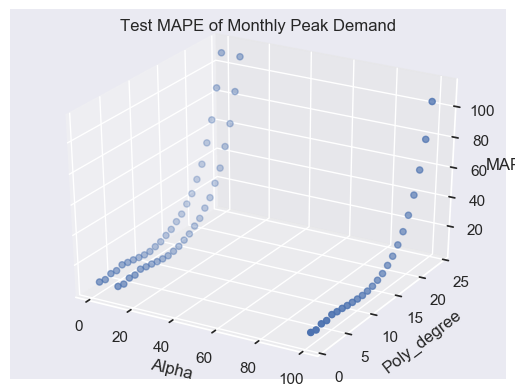

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mape_a_test, mape_p_test, mape_y_test)
ax.set_xlabel("Alpha")
ax.set_ylabel("Poly_degree")
ax.set_zlabel("MAPE")
plt.title("Test MAPE of Monthly Peak Demand")
plt.show()

In [83]:
mape_a_test = np.expand_dims(mape_a_test, axis = 1)
mape_p_test = np.expand_dims(mape_p_test, axis = 1)
mape_y_test = np.expand_dims(mape_y_test, axis = 1)
mape_test_arr = np.concatenate((mape_a_test, mape_p_test, mape_y_test), axis = 1)
np.set_printoptions(suppress = True)
mape_test_df = pd.DataFrame(data = mape_test_arr, columns = ["Alpha", "Poly_degree", "MAPE"])
print("Test MAPE of Monthly Peak Demand:")
print(mape_test_df)

Test MAPE of Monthly Peak Demand:
    Alpha  Poly_degree        MAPE
0     1.0          1.0    7.034267
1    10.0          1.0    7.037455
2   100.0          1.0    7.160501
3     1.0          2.0    6.163738
4    10.0          2.0    6.154760
5   100.0          2.0    6.205013
6     1.0          3.0    7.754352
7    10.0          3.0    7.749025
8   100.0          3.0    7.644135
9     1.0          4.0    7.330877
10   10.0          4.0    7.319055
11  100.0          4.0    7.227323
12    1.0          5.0    8.898142
13   10.0          5.0    8.879693
14  100.0          5.0    8.639933
15    1.0          6.0    8.054697
16   10.0          6.0    8.044005
17  100.0          6.0    7.980467
18    1.0          7.0    7.387982
19   10.0          7.0    7.462813
20  100.0          7.0    7.621467
21    1.0          8.0    6.577785
22   10.0          8.0    6.674563
23  100.0          8.0    6.977558
24    1.0          9.0    5.969890
25   10.0          9.0    6.136149
26  100.0          9.

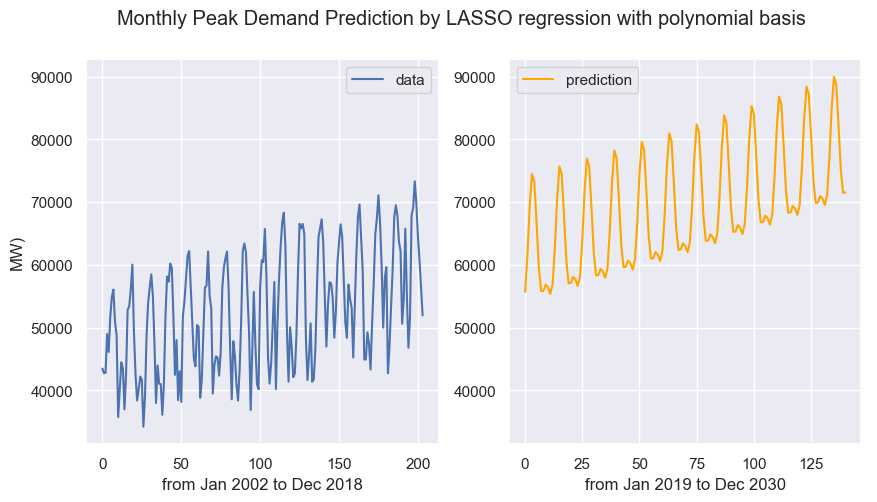

In [84]:
# Prediction

# Get weight value
# Alpha and poly_degree value to get lowest MAPE
a = 10
p = 2

x_train = []
for i in range(156 - 3):
    t_0 = poly_basis_single_sample(x_train_raw[i], p).flatten()
    t_1 = poly_basis_single_sample(x_train_raw[i + 1], p).flatten()
    t_2 = poly_basis_single_sample(x_train_raw[i + 2], p).flatten()
    x_train.append(np.concatenate((t_0, t_1, t_2)))

x_train = np.asarray(x_train)
y_train = y_train_raw[3:]

lasso_regressor = linear_model.Lasso(alpha = a, fit_intercept = False, tol = 0.01, max_iter = 10000)
lasso_regressor.fit(x_train, y_train)
w = lasso_regressor.coef_

x_pred = np.array([range(205, 349)]).T

# Combine sine and cosine feature
x_pred = sine_cosine_feature(x_pred, 12)

x_pred_order = []
for i in range(144 - 3):
    t_0 = poly_basis_single_sample(x_pred[i], p).flatten()
    t_1 = poly_basis_single_sample(x_pred[i + 1], p).flatten()
    t_2 = poly_basis_single_sample(x_pred[i + 2], p).flatten()
    x_pred_order.append(np.concatenate((t_0, t_1, t_2)))  
    
x_pred_order = np.asarray(x_pred_order)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1 = plt.subplot(121)
plt.plot(data_y, label = "data")
plt.xlabel("from Jan 2002 to Dec 2018")
plt.ylabel("MW)")
plt.legend()

ax2 = plt.subplot(122, sharey = ax1)
plt.plot(x_pred_order.dot(w), color = "orange", label = "prediction")
plt.xlabel("from Jan 2019 to Dec 2030")
plt.legend()

f.suptitle("Monthly Peak Demand Prediction by LASSO regression with polynomial basis")
plt.show()